Transformation des fichiers stéréo en mono

In [41]:
#import des bibliothèques
import numpy as np
import os
import librosa
import soundfile as sf
from glob import glob
import librosa as lr

from os import listdir
from os.path import isfile, join
from pathlib import Path
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt


In [42]:
#Chargement des sons initiaux
data_dir_ini = './audio/raw_sound_ini/'

In [43]:
#Convertion des sons du repertoire en mono
sounds_name_ini = [f for f in listdir(data_dir_ini) if isfile(join(data_dir_ini, f))and f.endswith(".wav")]

for sound in sounds_name_ini:
    path = data_dir_ini+sound
    y, sr = librosa.load(path, mono=False)
    y_mono = y[0, :]
    file_name_out = "./audio/raw_data_mono/" + Path(sound).stem + "_mono.wav"
    sf.write(file_name_out, y_mono, sr)

In [44]:
#Fonction pour filtrer les bruits
def filter_sound (audio, cutoff, order):
    
    sounds_name = [f for f in listdir(audio) if isfile(join(audio, f)) and f.endswith(".wav")]

    for sound in sounds_name:

        sound_name = audio + sound

        y, sr = librosa.load(sound_name)

        #Sound is previously normalized
        max_val = np.max(np.abs(y))
        y_norm = y / max_val

        #Passe haut
        nyquist = 0.5 * sr
        normal_cutoff = cutoff / nyquist
        b, a = butter(order, normal_cutoff, btype='high', analog=False)
        filtered_audio = filtfilt(b, a, y_norm)

        #Extraction du fichier
        file_name_out = "./audio/raw_data_filtered/" + sound.replace("_mono", "_filtered")

        sf.write(file_name_out, filtered_audio, sr )

In [45]:
#Filtrage des bruits
sr =22500 #Fréquence d'échantillonnage
cutoff = 100  # Fréquence de coupure en Hz
order = 4  # Ordre du filtre

data_dir_ini = './audio/raw_data_mono/' #Dossier avec les sons

filter_sound (data_dir_ini, cutoff, order)

In [46]:
#Fonction pour normalisation en temps
def remove_silence(data, threshold, duration, lag, attack):

    sounds_name = [f for f in listdir(data) if isfile(join(data, f)) and f.endswith(".wav")]

    for sound in sounds_name:
        y, sr = librosa.load(data+sound)

        #Sound is previously normalized
        max_val = np.max(np.abs(y))
        y_norm = y / max_val

        #Sound is then extruded
        raw_start = np.min(np.where(np.abs(y_norm)>threshold))
        min_near_first = np.argmin(np.abs(y_norm[raw_start-lag : raw_start])) 
        start = raw_start - lag + min_near_first
        sig_without_silence = y_norm[start : start + duration]
        sig_without_attack = sig_without_silence[int(attack*sr) : ]

        file_name_out = "./audio/raw_data_time_norm/" + sound.replace("_filtered", "_norm_time")

        sf.write(file_name_out, sig_without_attack, sr)

In [47]:
#Normalisation en temps après filtrage
data_dir_ini = './audio/raw_data_filtered/' #chargement des fichiers filtrés

sr = 22500
threshold = 0.5e-01
duration = int(0.25 * sr)  # durée du temps 25 ms
lag = 5 # in samples

attack = 0.009 #définition de la durée de l'attaque

remove_silence(data_dir_ini, threshold, duration, lag, attack) #Suppression des silences

In [48]:
#Fonction de normalisation en amplitude
def ampl_normalize_audio(data_dir):

    sounds_name = [f for f in listdir(data_dir) if isfile(join(data_dir, f)) and f.endswith(".wav")]

    for sound in sounds_name:
        sound_name = data_dir + sound

        y, sr = librosa.load(sound_name)

        max_val = np.max(np.abs(y))
        normalized_audio = y / max_val

        file_name_out = "./audio/raw_data_ampl_norm/" + sound.replace("_norm_time", "_ampl_norm")

        sf.write(file_name_out, normalized_audio, sr )

In [49]:
#Normalisation en amplitude
data_dir_ini = './audio/raw_data_time_norm/'

ampl_normalize_audio(data_dir_ini)

./data_traited/ini/raw_data_ampl_norm/M_pl_c_1_ini_ampl_norm.wav


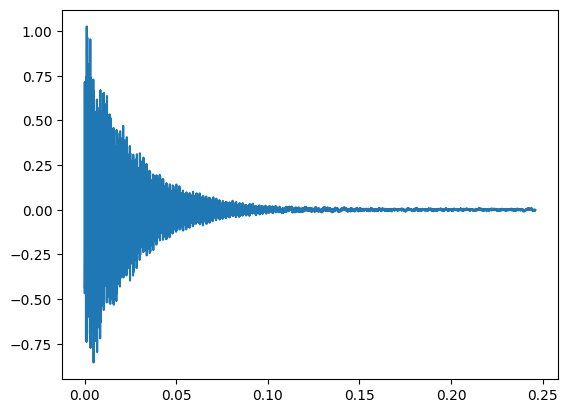

./data_traited/ini/raw_data_ampl_norm/M_pl_a1_1_ini_ampl_norm.wav


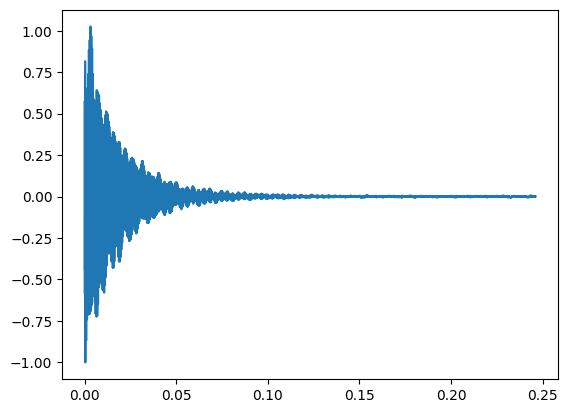

./data_traited/ini/raw_data_ampl_norm/S_pl_a_8_ini_ampl_norm.wav


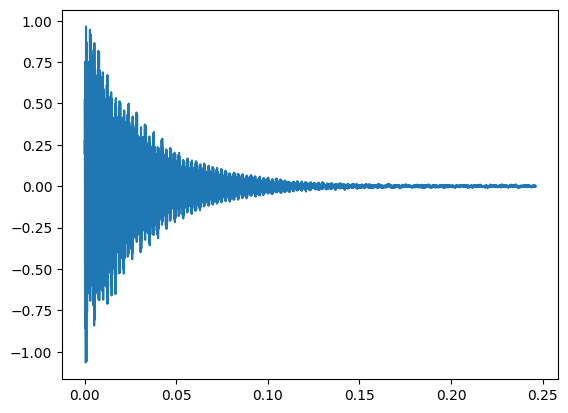

./data_traited/ini/raw_data_ampl_norm/P_pl_a_3_ini_ampl_norm.wav


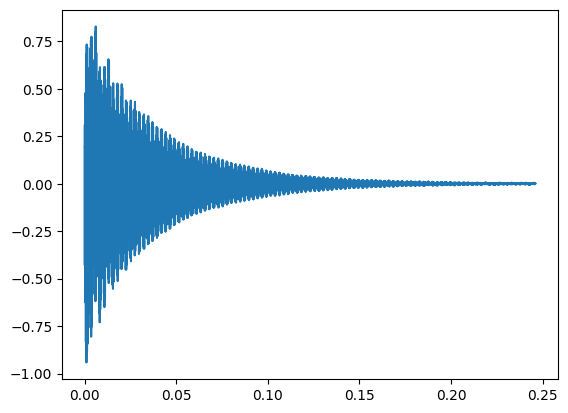

./data_traited/ini/raw_data_ampl_norm/M_pt_c2_2_ini_ampl_norm.wav


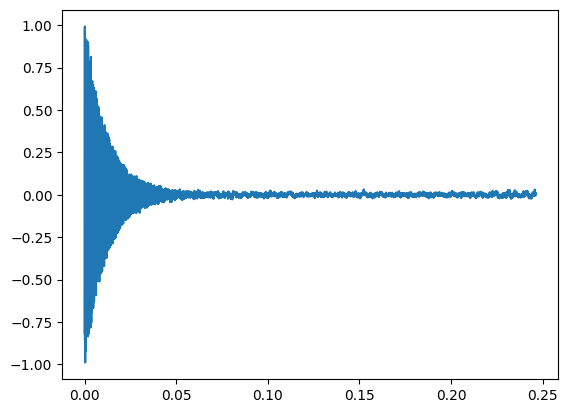

./data_traited/ini/raw_data_ampl_norm/S_pl_d_9_ini_ampl_norm.wav


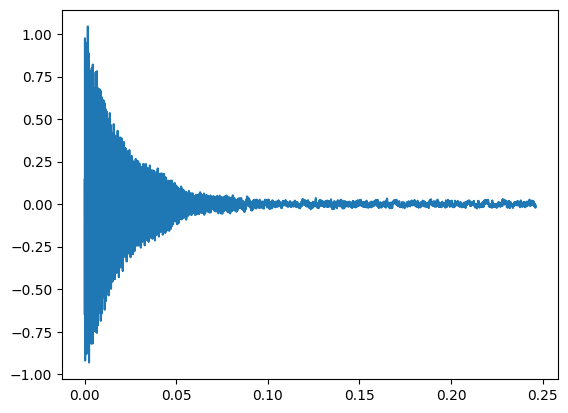

./data_traited/ini/raw_data_ampl_norm/L_pl_b_2_ini_ampl_norm.wav


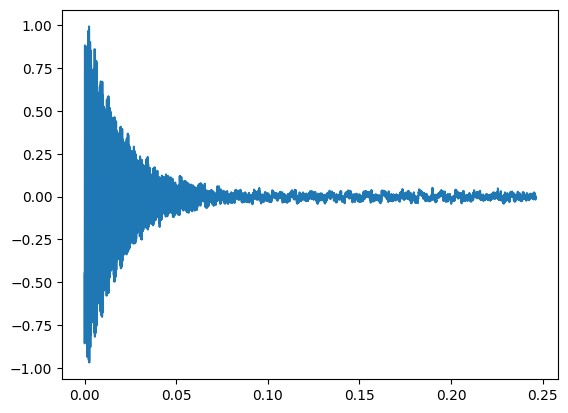

./data_traited/ini/raw_data_ampl_norm/L_pt_e3_2_ini_ampl_norm.wav


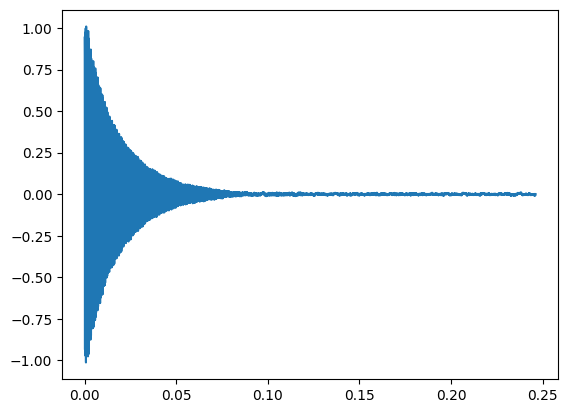

./data_traited/ini/raw_data_ampl_norm/L_pl_e_6_ini_ampl_norm.wav


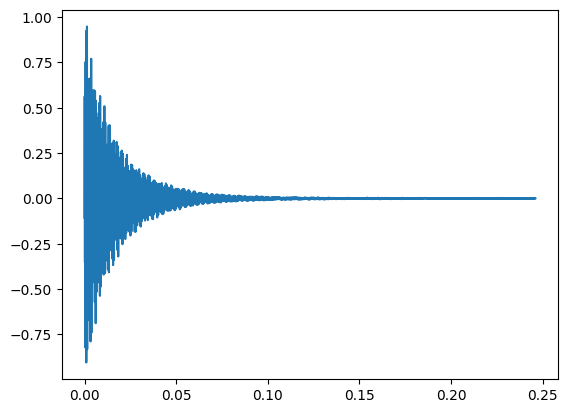

./data_traited/ini/raw_data_ampl_norm/L_pt_a4_1_ini_ampl_norm.wav


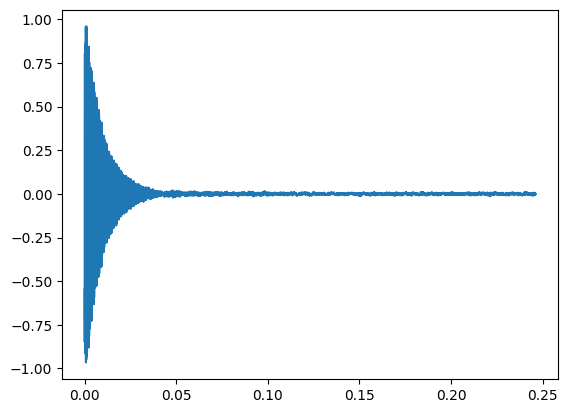

./data_traited/ini/raw_data_ampl_norm/M_pt_b4_1_ini_ampl_norm.wav


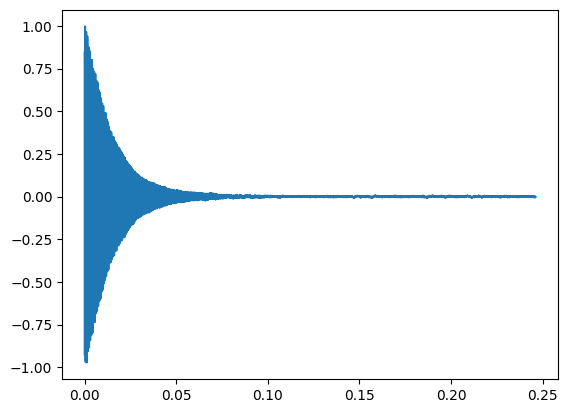

./data_traited/ini/raw_data_ampl_norm/L_pl_a_7_ini_ampl_norm.wav


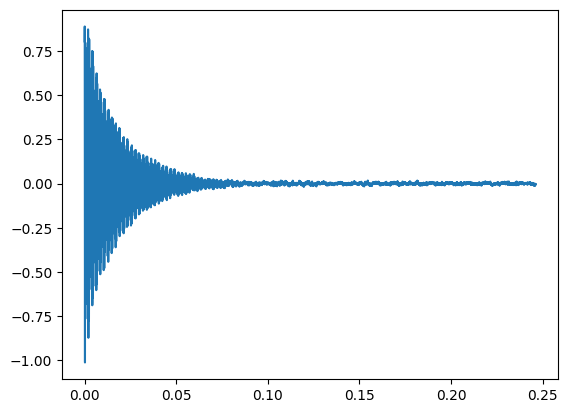

./data_traited/ini/raw_data_ampl_norm/M_pl_b_1_ini_ampl_norm.wav


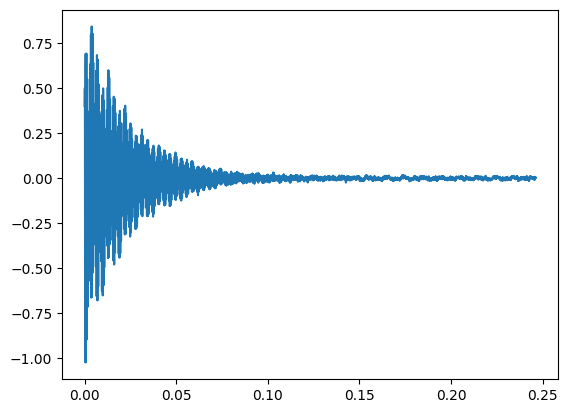

./data_traited/ini/raw_data_ampl_norm/M_pl_a2_4_ini_ampl_norm.wav


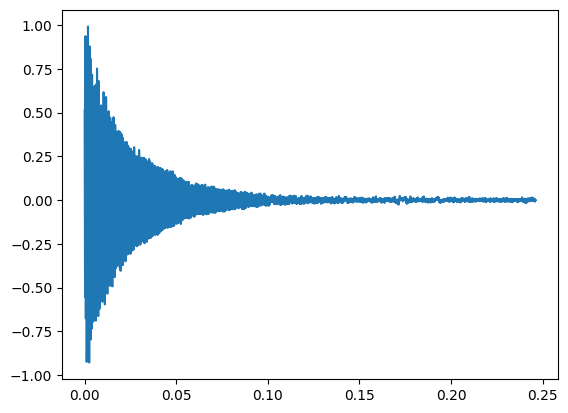

./data_traited/ini/raw_data_ampl_norm/L_pt_e2_2_ini_ampl_norm.wav


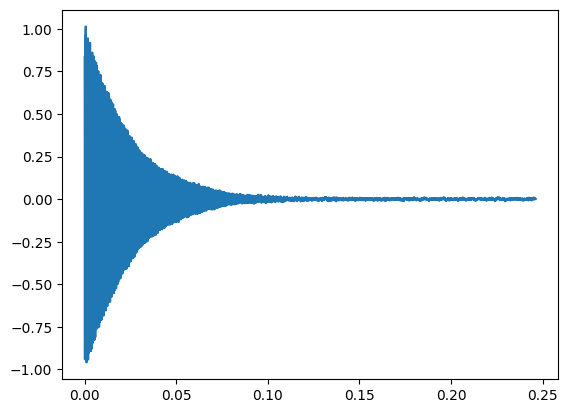

./data_traited/ini/raw_data_ampl_norm/M_pt_c3_2_ini_ampl_norm.wav


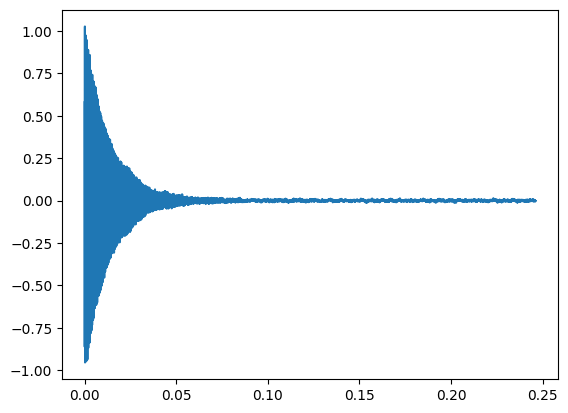

./data_traited/ini/raw_data_ampl_norm/M_pl_c_4_ini_ampl_norm.wav


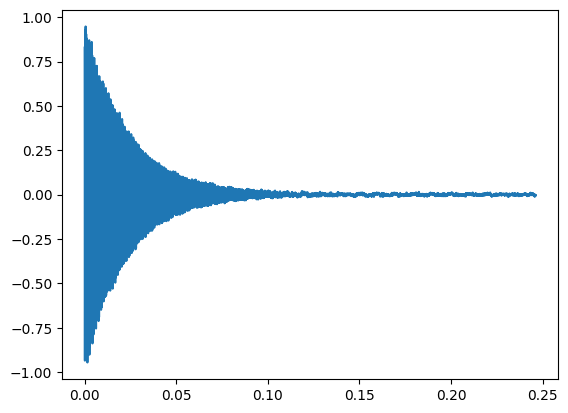

./data_traited/ini/raw_data_ampl_norm/M_pl_a1_4_ini_ampl_norm.wav


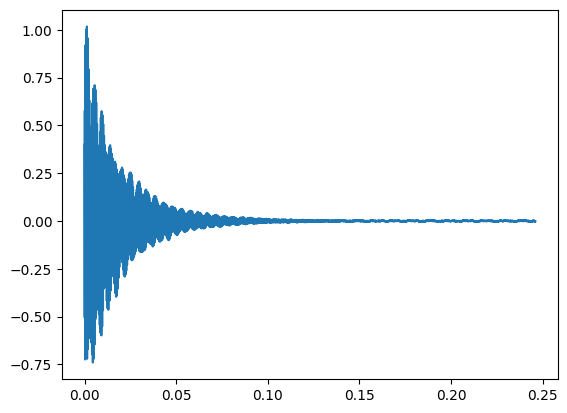

./data_traited/ini/raw_data_ampl_norm/L_pl_e_3_ini_ampl_norm.wav


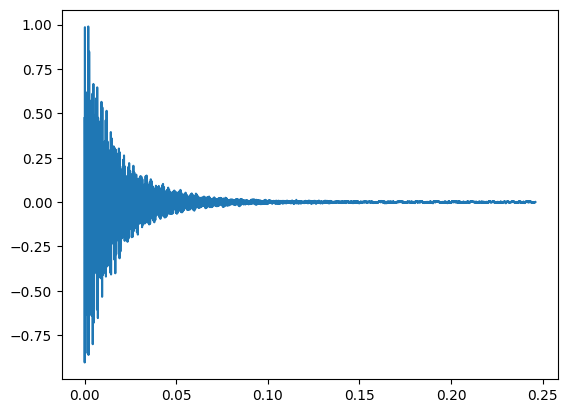

./data_traited/ini/raw_data_ampl_norm/L_pt_e4_3_ini_ampl_norm.wav


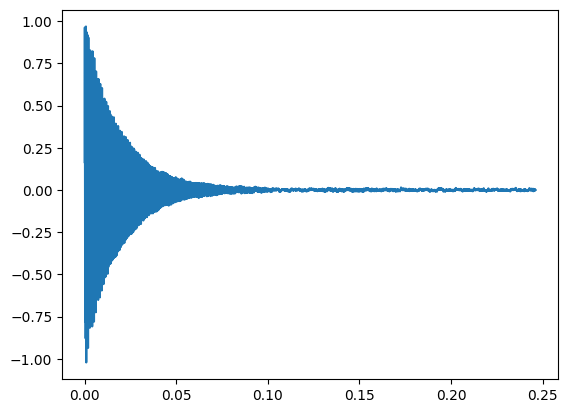

./data_traited/ini/raw_data_ampl_norm/M_pl_f_5_ini_ampl_norm.wav


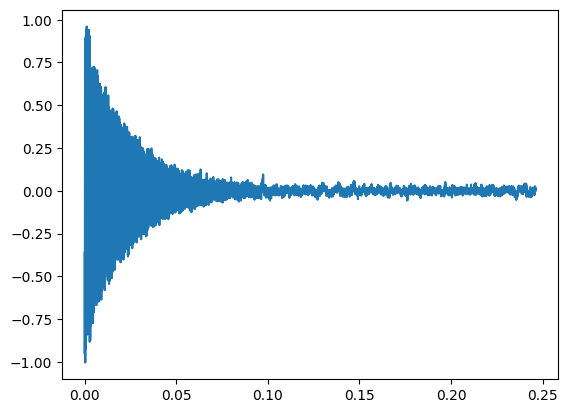

./data_traited/ini/raw_data_ampl_norm/L_pl_b_7_ini_ampl_norm.wav


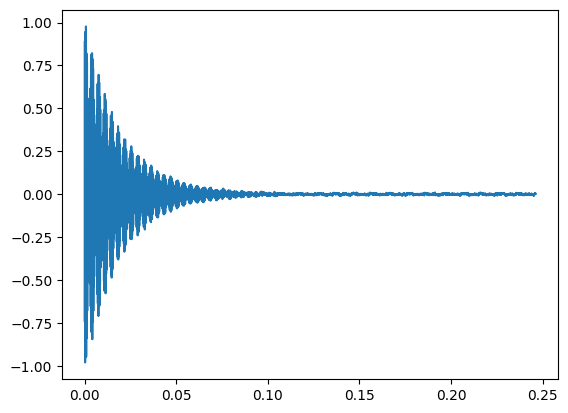

./data_traited/ini/raw_data_ampl_norm/P_pl_a_6_ini_ampl_norm.wav


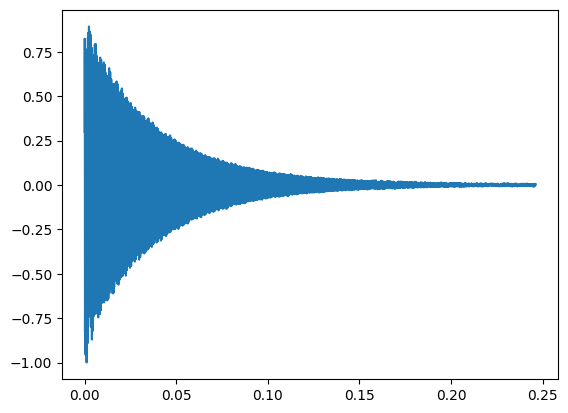

./data_traited/ini/raw_data_ampl_norm/M_pl_b_4_ini_ampl_norm.wav


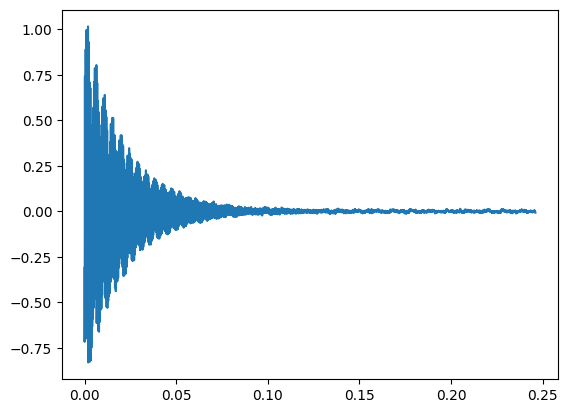

./data_traited/ini/raw_data_ampl_norm/L_pl_a_2_ini_ampl_norm.wav


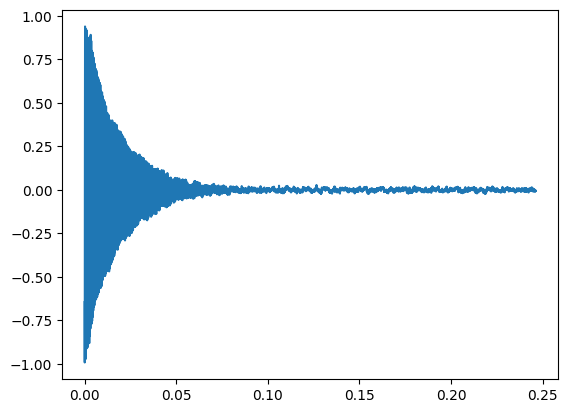

./data_traited/ini/raw_data_ampl_norm/M_pl_a2_1_ini_ampl_norm.wav


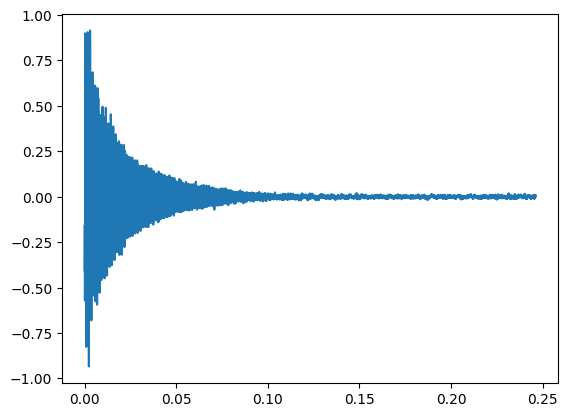

./data_traited/ini/raw_data_ampl_norm/M_pt_c4_3_ini_ampl_norm.wav


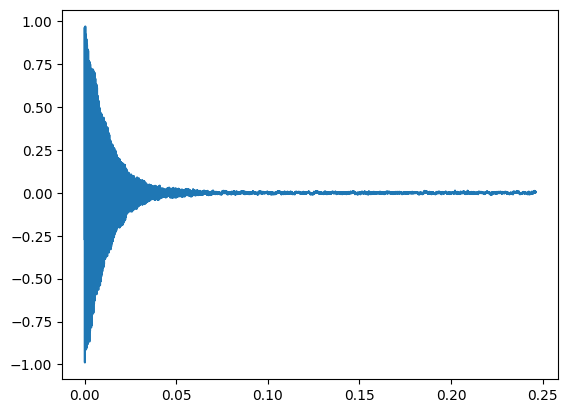

./data_traited/ini/raw_data_ampl_norm/S_pl_a_9_ini_ampl_norm.wav


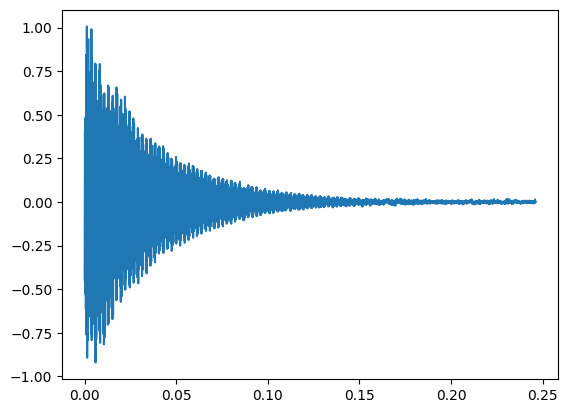

./data_traited/ini/raw_data_ampl_norm/L_pt_e3_3_ini_ampl_norm.wav


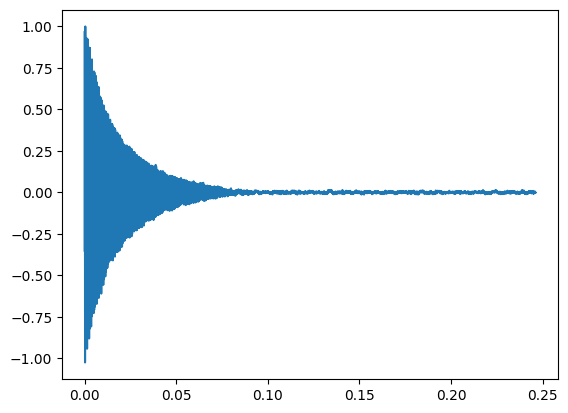

./data_traited/ini/raw_data_ampl_norm/L_pl_b_3_ini_ampl_norm.wav


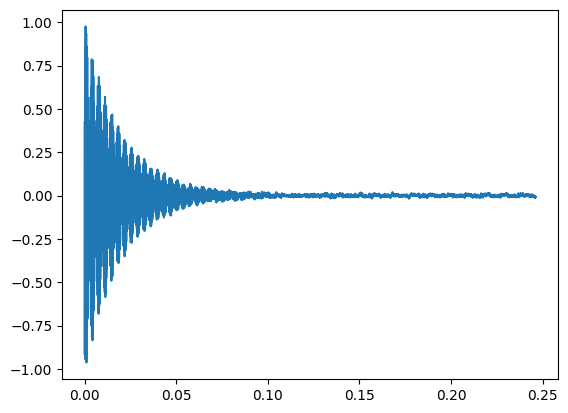

./data_traited/ini/raw_data_ampl_norm/S_pl_d_8_ini_ampl_norm.wav


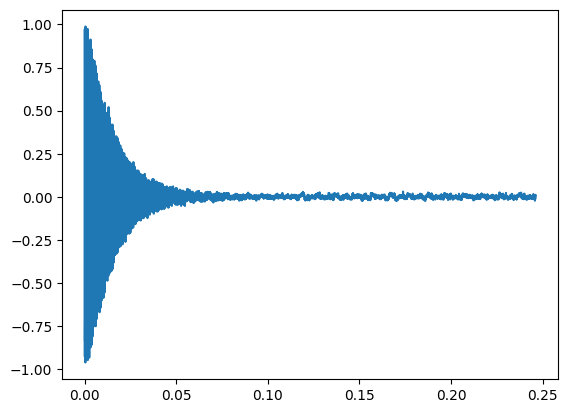

./data_traited/ini/raw_data_ampl_norm/M_pt_c2_3_ini_ampl_norm.wav


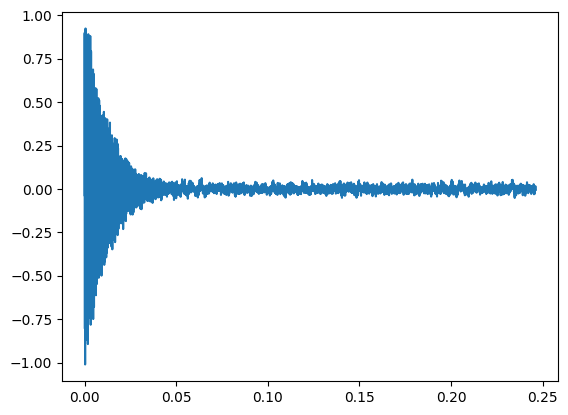

./data_traited/ini/raw_data_ampl_norm/P_pl_a_2_ini_ampl_norm.wav


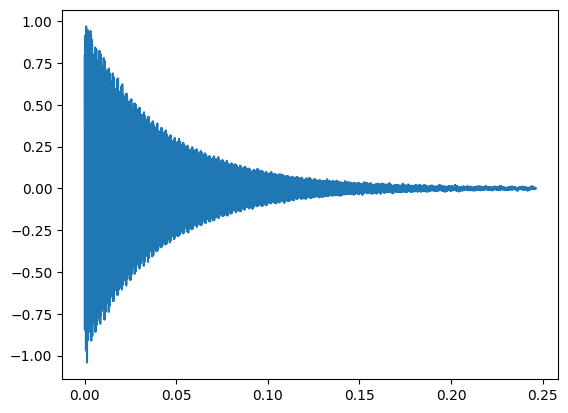

./data_traited/ini/raw_data_ampl_norm/L_pl_e_7_ini_ampl_norm.wav


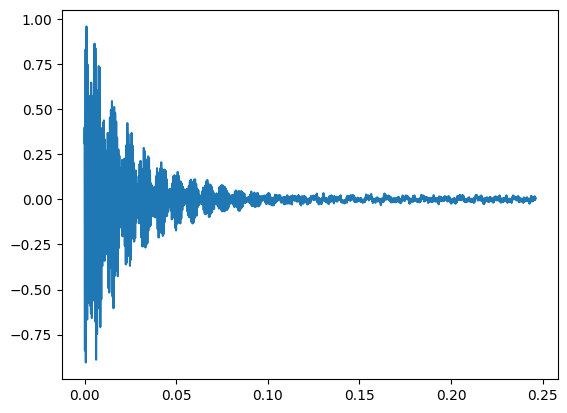

./data_traited/ini/raw_data_ampl_norm/M_pl_f_1_ini_ampl_norm.wav


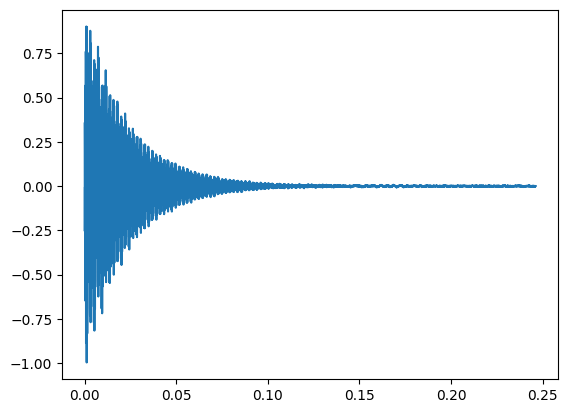

./data_traited/ini/raw_data_ampl_norm/L_pl_a_6_ini_ampl_norm.wav


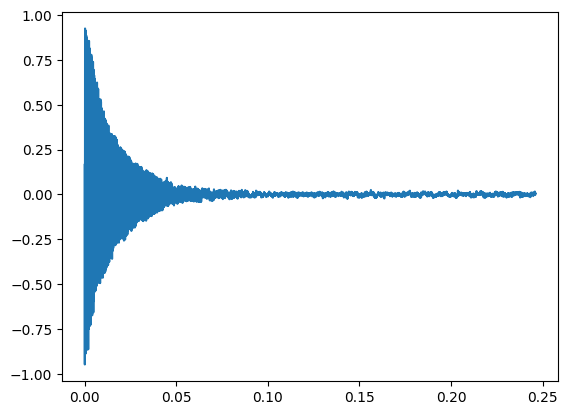

./data_traited/ini/raw_data_ampl_norm/M_pl_a2_5_ini_ampl_norm.wav


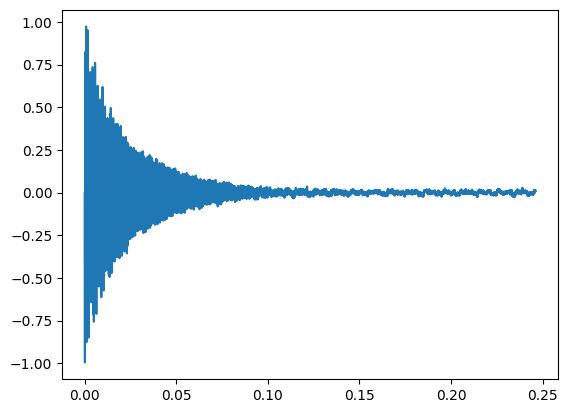

./data_traited/ini/raw_data_ampl_norm/M_pt_c3_3_ini_ampl_norm.wav


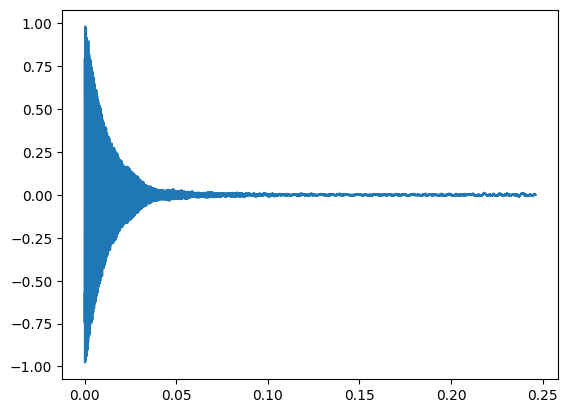

./data_traited/ini/raw_data_ampl_norm/L_pt_e2_3_ini_ampl_norm.wav


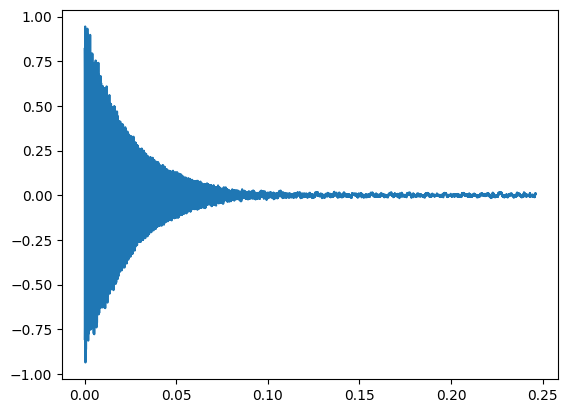

./data_traited/ini/raw_data_ampl_norm/L_pt_a2_1_ini_ampl_norm.wav


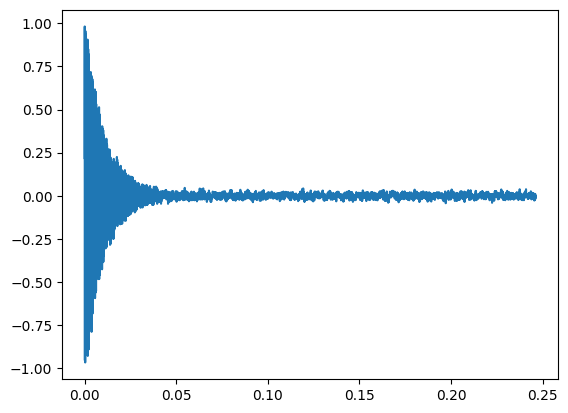

./data_traited/ini/raw_data_ampl_norm/M_pt_b2_1_ini_ampl_norm.wav


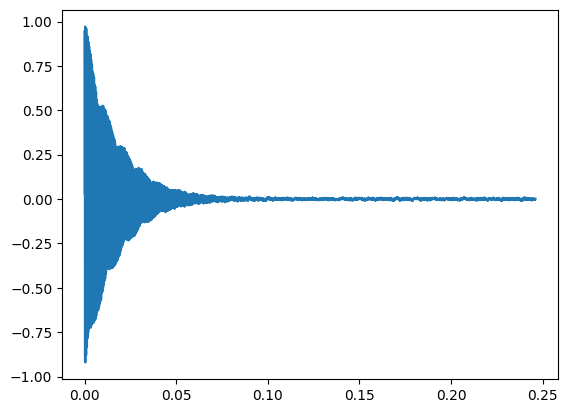

./data_traited/ini/raw_data_ampl_norm/M_pl_c_5_ini_ampl_norm.wav


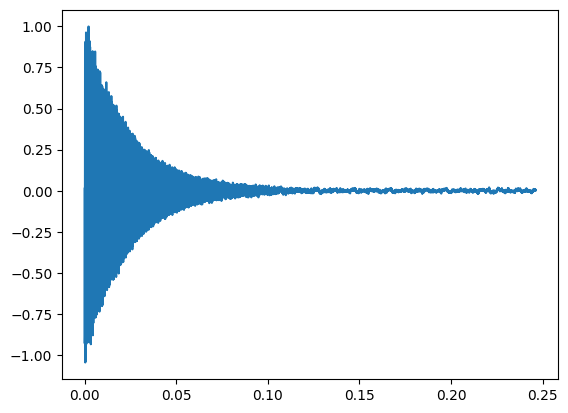

./data_traited/ini/raw_data_ampl_norm/M_pl_a1_5_ini_ampl_norm.wav


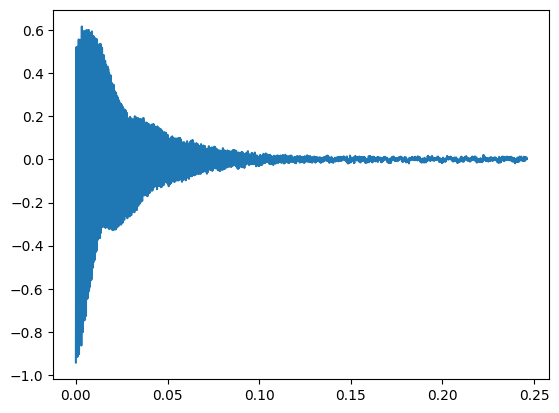

./data_traited/ini/raw_data_ampl_norm/M_pl_f_4_ini_ampl_norm.wav


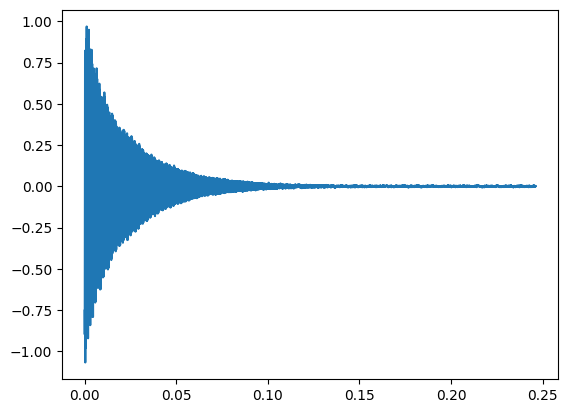

./data_traited/ini/raw_data_ampl_norm/L_pt_e4_2_ini_ampl_norm.wav


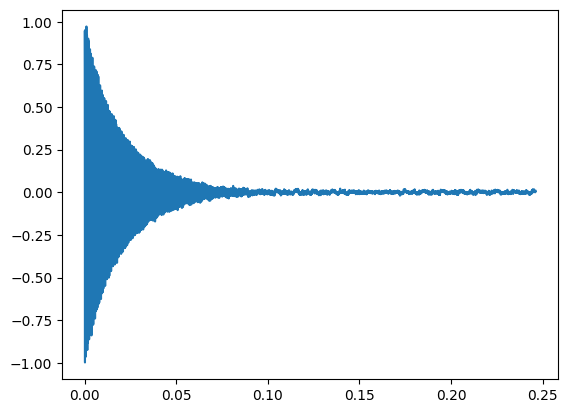

./data_traited/ini/raw_data_ampl_norm/L_pl_e_2_ini_ampl_norm.wav


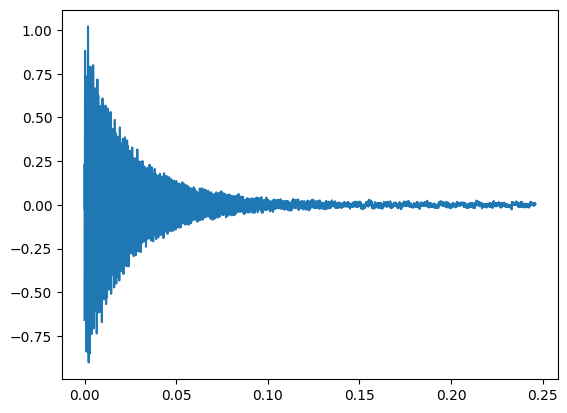

./data_traited/ini/raw_data_ampl_norm/P_pl_a_7_ini_ampl_norm.wav


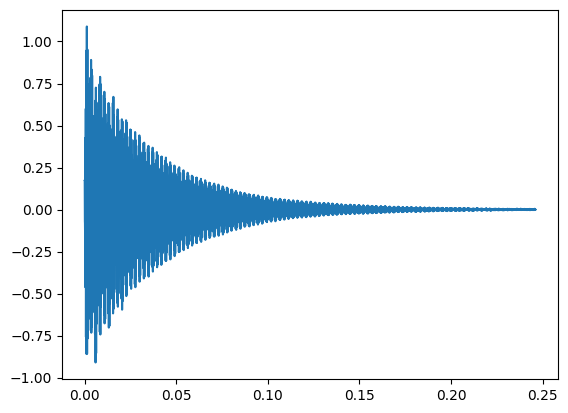

./data_traited/ini/raw_data_ampl_norm/L_pl_b_6_ini_ampl_norm.wav


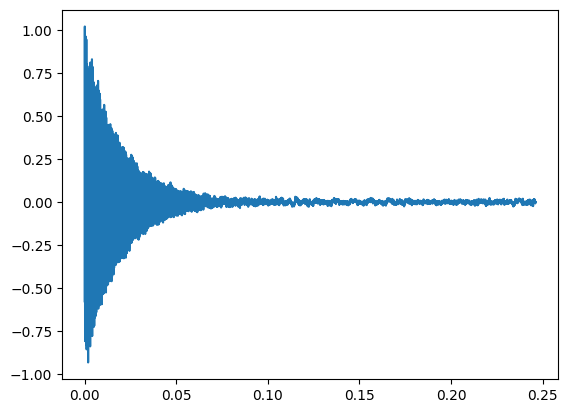

./data_traited/ini/raw_data_ampl_norm/L_pt_a3_1_ini_ampl_norm.wav


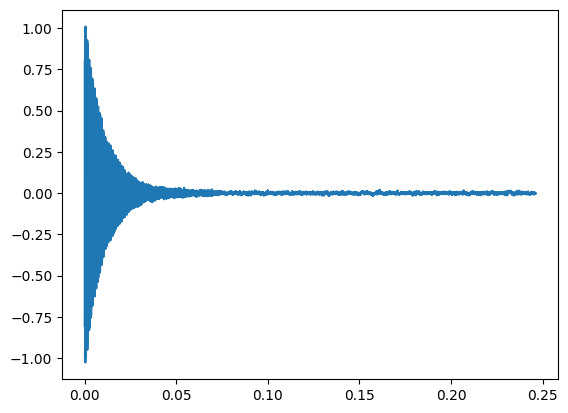

./data_traited/ini/raw_data_ampl_norm/L_pl_a_3_ini_ampl_norm.wav


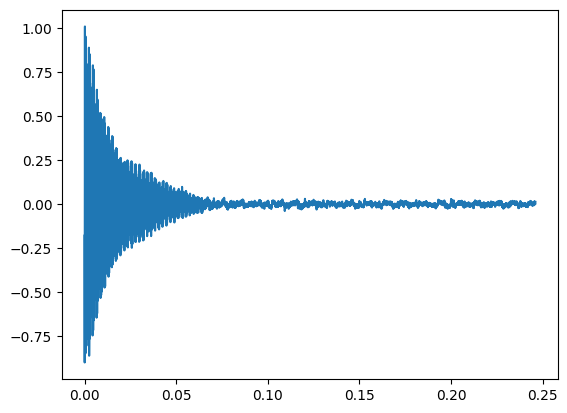

./data_traited/ini/raw_data_ampl_norm/M_pl_b_5_ini_ampl_norm.wav


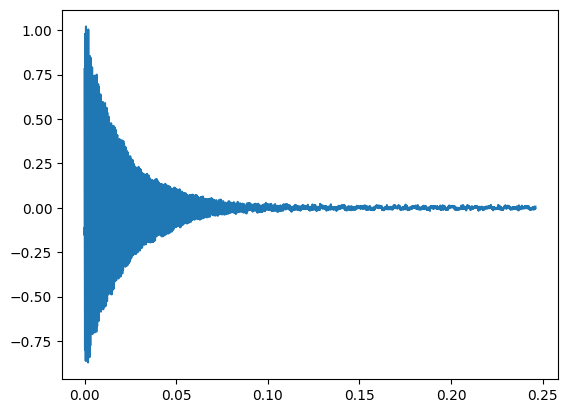

./data_traited/ini/raw_data_ampl_norm/M_pt_b3_1_ini_ampl_norm.wav


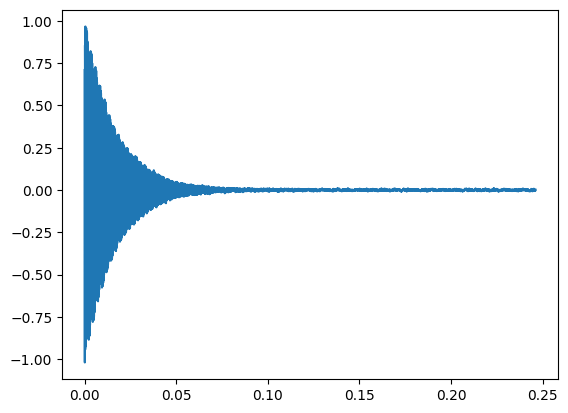

./data_traited/ini/raw_data_ampl_norm/M_pt_c4_2_ini_ampl_norm.wav


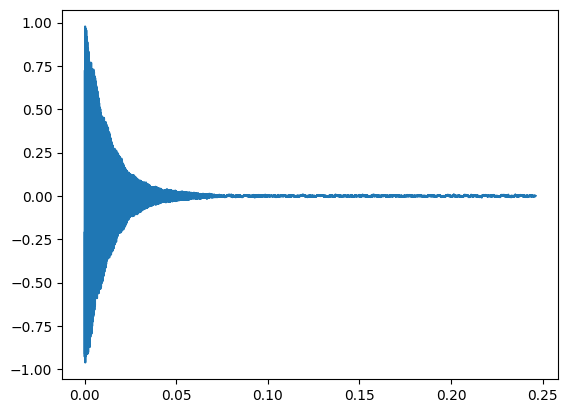

./data_traited/ini/raw_data_ampl_norm/M_pl_a1_3_ini_ampl_norm.wav


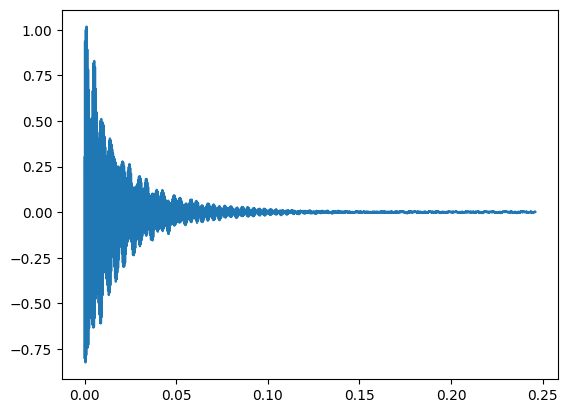

./data_traited/ini/raw_data_ampl_norm/M_pl_c_3_ini_ampl_norm.wav


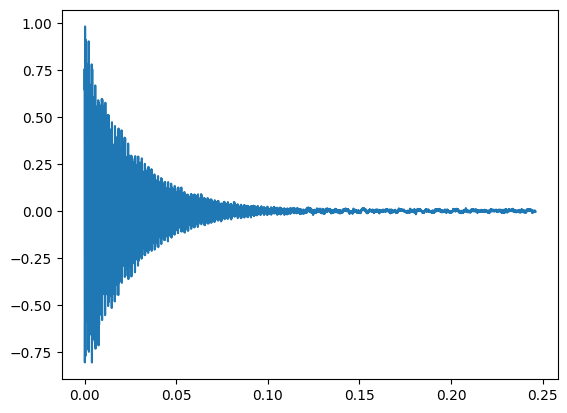

./data_traited/ini/raw_data_ampl_norm/P_pl_a_1_ini_ampl_norm.wav


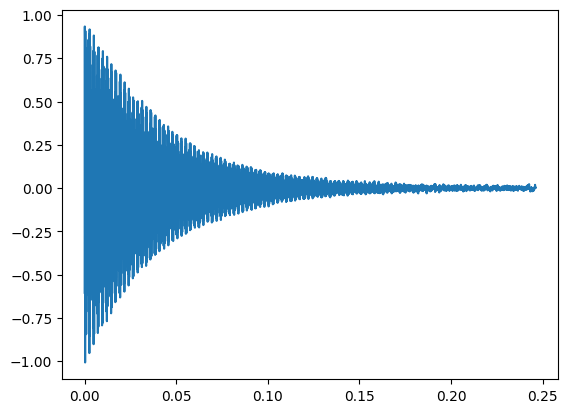

./data_traited/ini/raw_data_ampl_norm/L_pl_e_4_ini_ampl_norm.wav


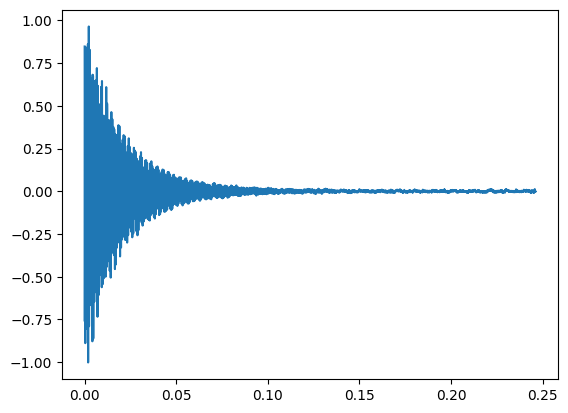

./data_traited/ini/raw_data_ampl_norm/M_pl_f_2_ini_ampl_norm.wav


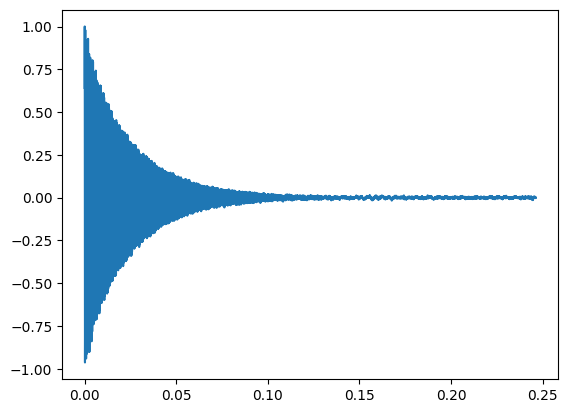

./data_traited/ini/raw_data_ampl_norm/M_pt_b4_3_ini_ampl_norm.wav


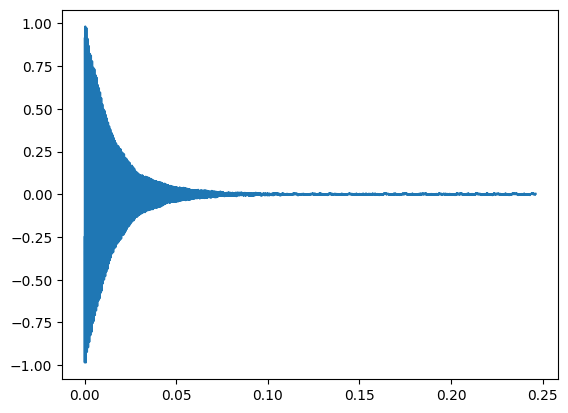

./data_traited/ini/raw_data_ampl_norm/L_pt_a4_3_ini_ampl_norm.wav


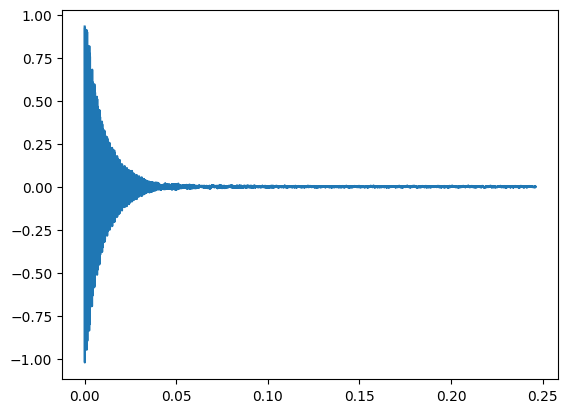

./data_traited/ini/raw_data_ampl_norm/M_pl_b_3_ini_ampl_norm.wav


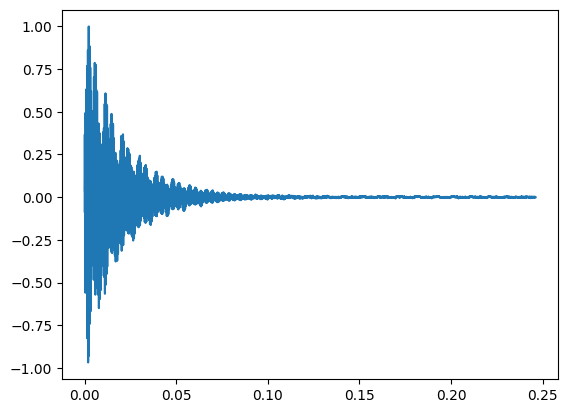

./data_traited/ini/raw_data_ampl_norm/L_pl_a_5_ini_ampl_norm.wav


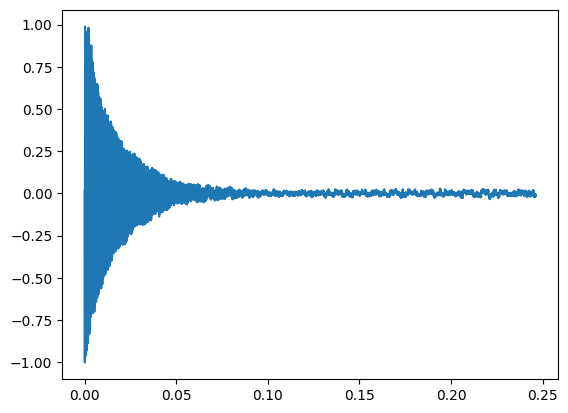

./data_traited/ini/raw_data_ampl_norm/LG_pl_a_9_ini_ampl_norm.wav


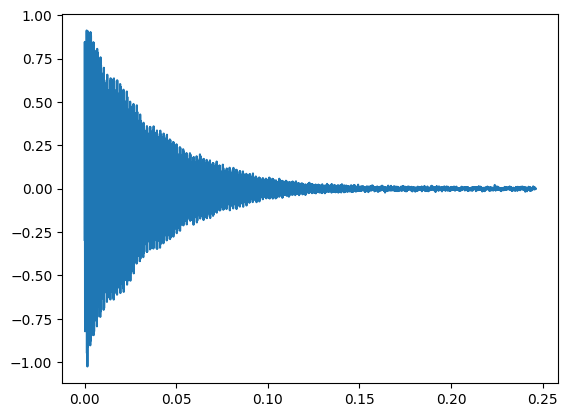

./data_traited/ini/raw_data_ampl_norm/M_pl_a2_6_ini_ampl_norm.wav


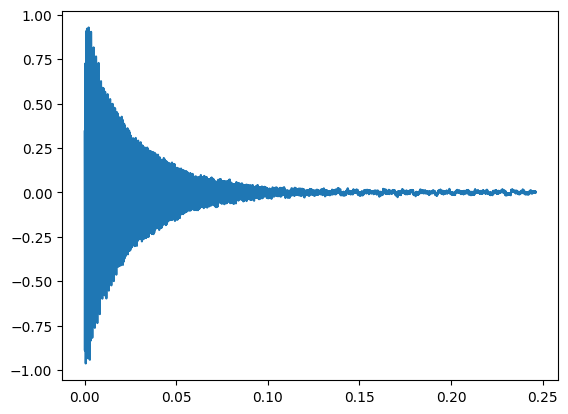

./data_traited/ini/raw_data_ampl_norm/M_pl_a1_6_ini_ampl_norm.wav


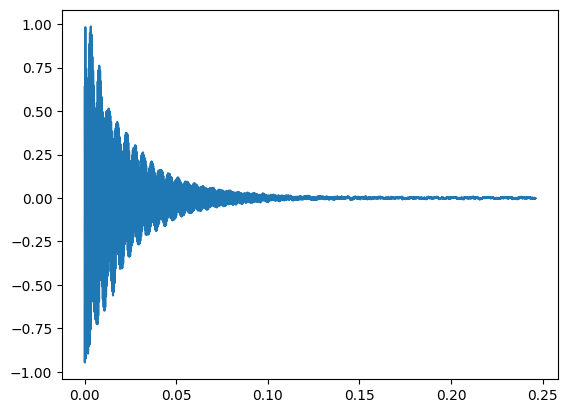

./data_traited/ini/raw_data_ampl_norm/L_pt_a2_2_ini_ampl_norm.wav


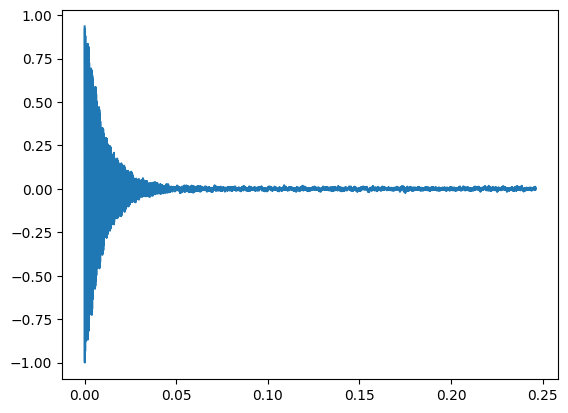

./data_traited/ini/raw_data_ampl_norm/M_pl_c_6_ini_ampl_norm.wav


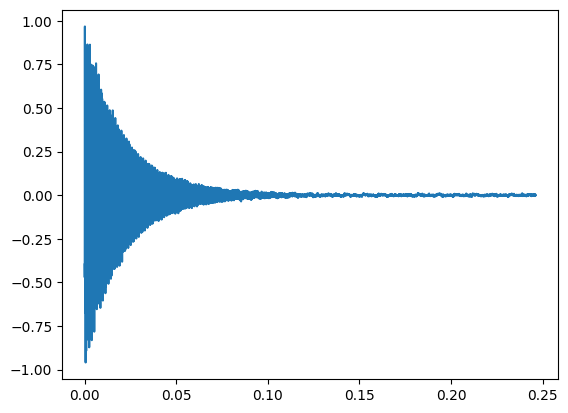

./data_traited/ini/raw_data_ampl_norm/M_pt_b2_2_ini_ampl_norm.wav


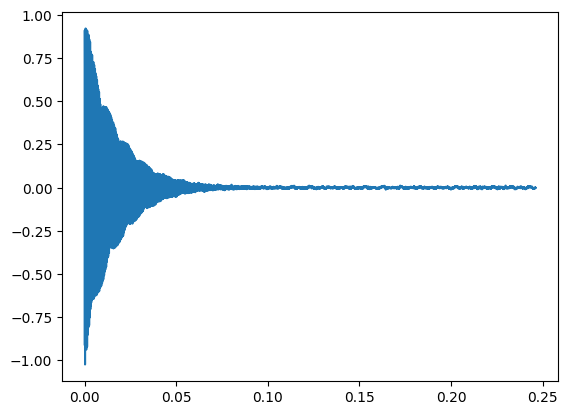

./data_traited/ini/raw_data_ampl_norm/M_pl_f_7_ini_ampl_norm.wav


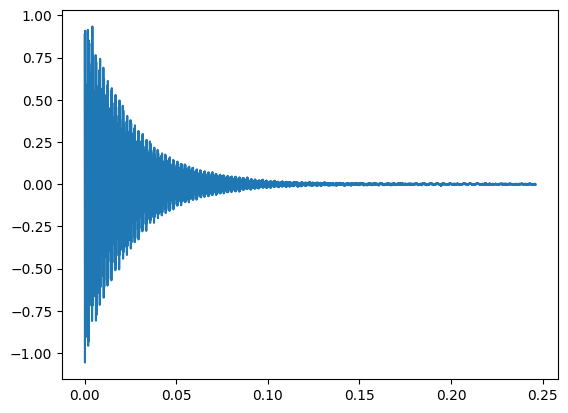

./data_traited/ini/raw_data_ampl_norm/L_pt_e4_1_ini_ampl_norm.wav


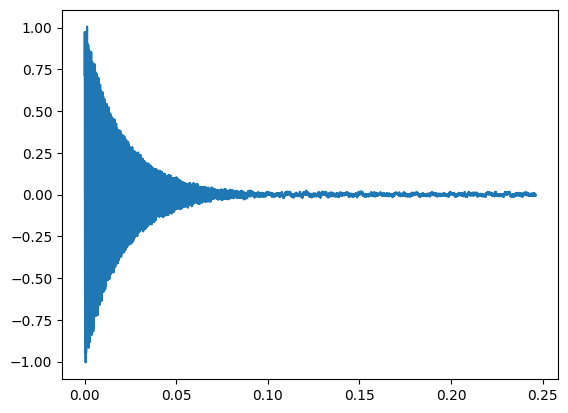

./data_traited/ini/raw_data_ampl_norm/L_pl_e_1_ini_ampl_norm.wav


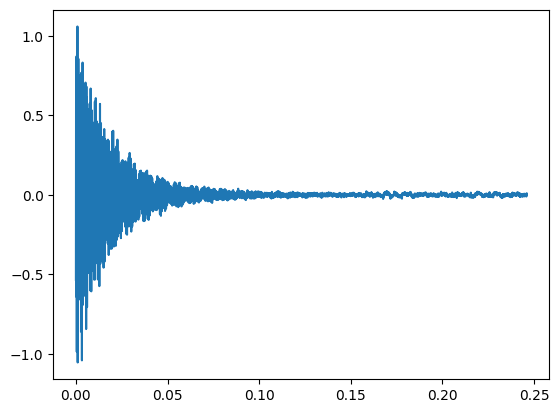

./data_traited/ini/raw_data_ampl_norm/P_pl_a_4_ini_ampl_norm.wav


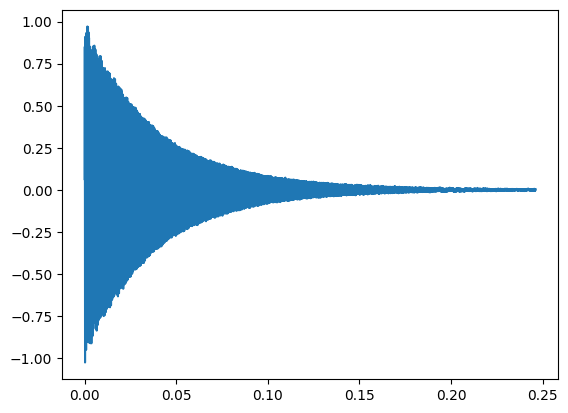

./data_traited/ini/raw_data_ampl_norm/L_pl_b_5_ini_ampl_norm.wav


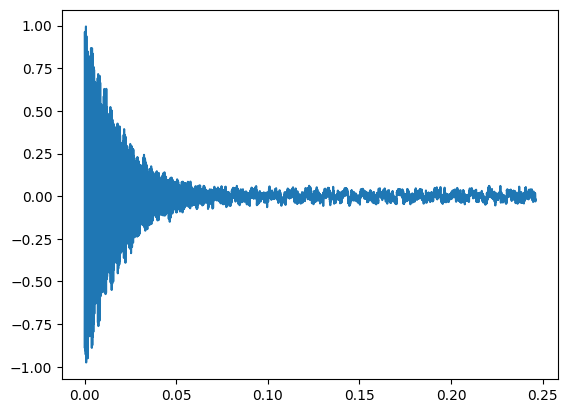

./data_traited/ini/raw_data_ampl_norm/L_pt_a3_2_ini_ampl_norm.wav


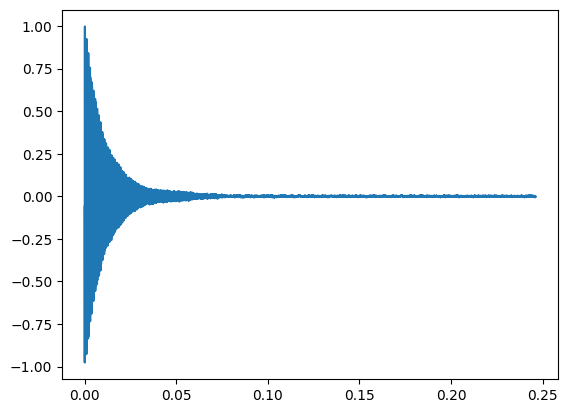

./data_traited/ini/raw_data_ampl_norm/M_pt_b3_2_ini_ampl_norm.wav


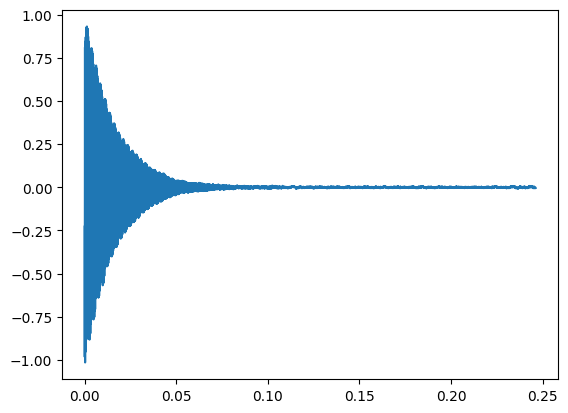

./data_traited/ini/raw_data_ampl_norm/M_pl_b_6_ini_ampl_norm.wav


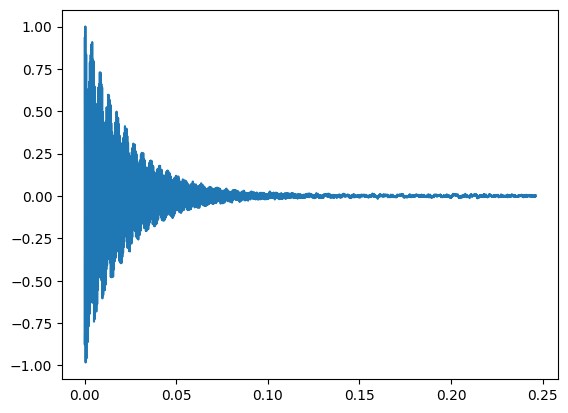

./data_traited/ini/raw_data_ampl_norm/M_pl_a2_3_ini_ampl_norm.wav


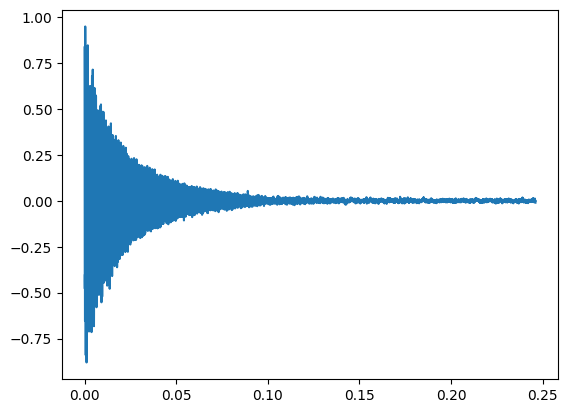

./data_traited/ini/raw_data_ampl_norm/M_pt_c4_1_ini_ampl_norm.wav


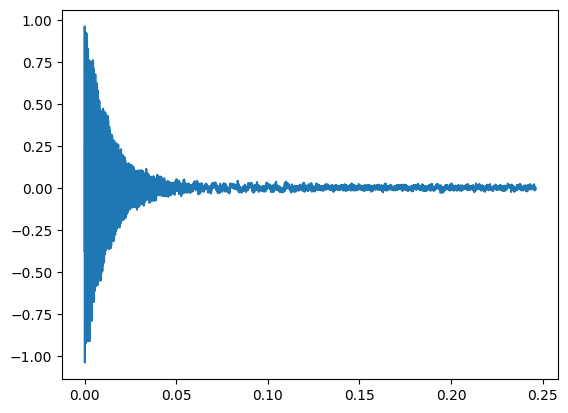

./data_traited/ini/raw_data_ampl_norm/M_pl_a1_2_ini_ampl_norm.wav


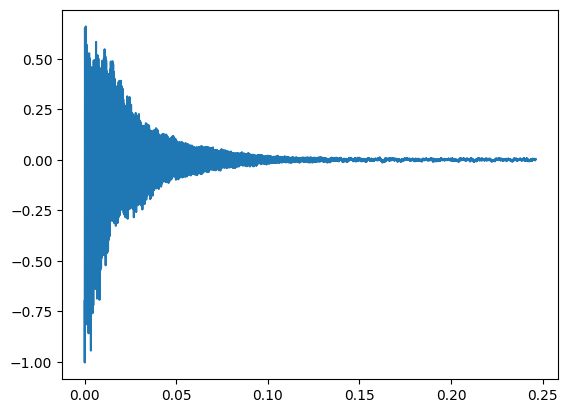

./data_traited/ini/raw_data_ampl_norm/M_pl_c_2_ini_ampl_norm.wav


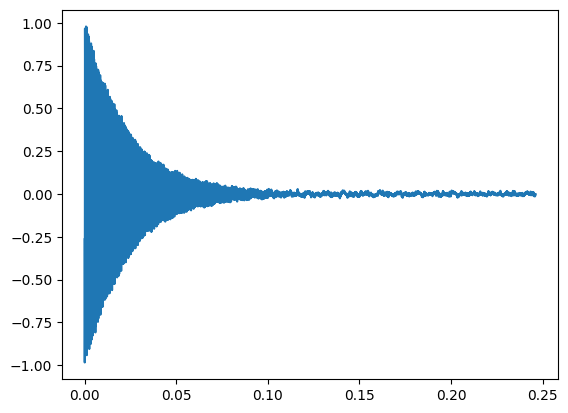

./data_traited/ini/raw_data_ampl_norm/M_pt_c2_1_ini_ampl_norm.wav


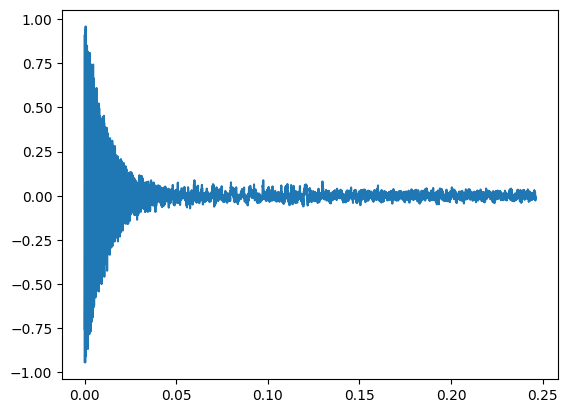

./data_traited/ini/raw_data_ampl_norm/L_pl_b_1_ini_ampl_norm.wav


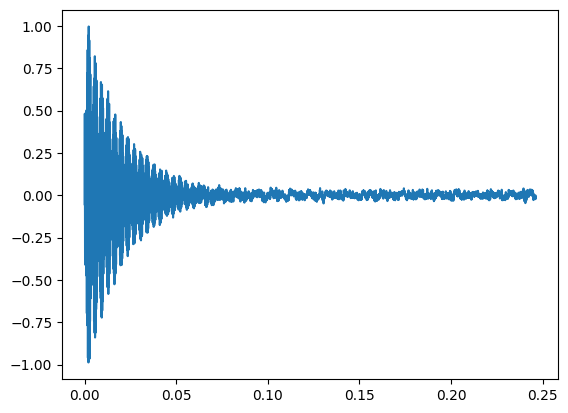

./data_traited/ini/raw_data_ampl_norm/L_pt_e3_1_ini_ampl_norm.wav


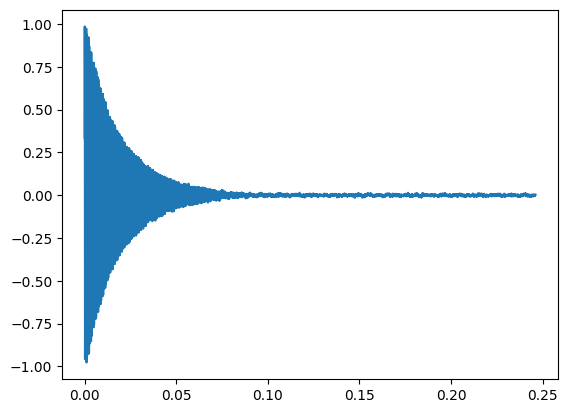

./data_traited/ini/raw_data_ampl_norm/M_pl_f_3_ini_ampl_norm.wav


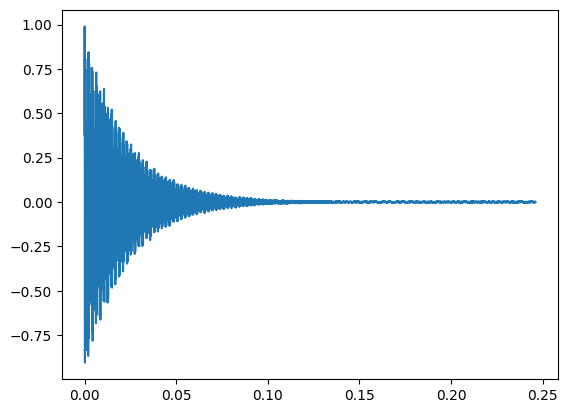

./data_traited/ini/raw_data_ampl_norm/L_pl_e_5_ini_ampl_norm.wav


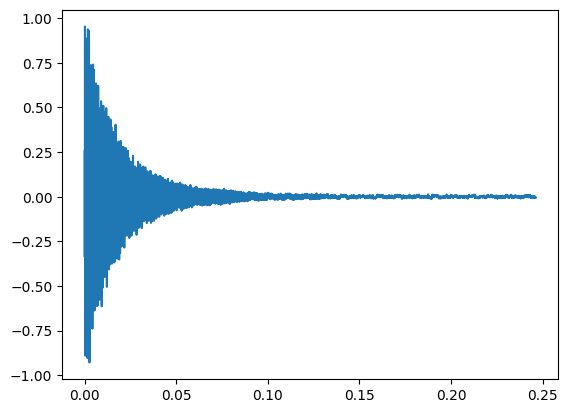

./data_traited/ini/raw_data_ampl_norm/L_pt_a4_2_ini_ampl_norm.wav


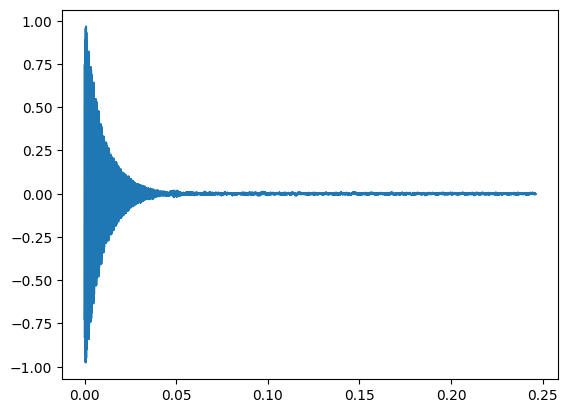

./data_traited/ini/raw_data_ampl_norm/M_pt_b4_2_ini_ampl_norm.wav


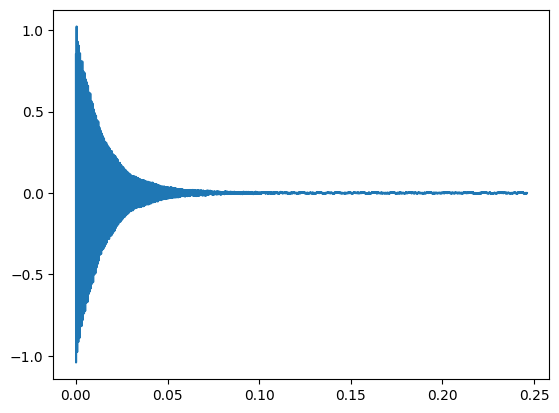

./data_traited/ini/raw_data_ampl_norm/L_pl_a_4_ini_ampl_norm.wav


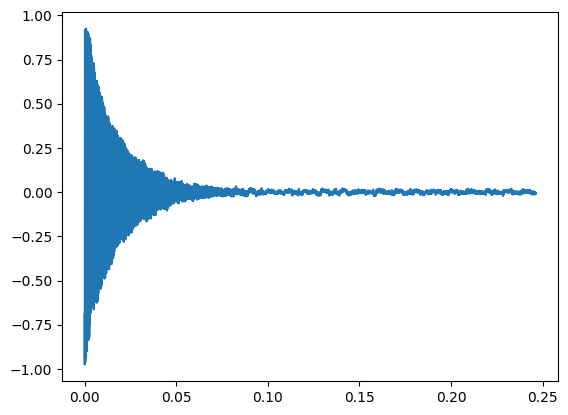

./data_traited/ini/raw_data_ampl_norm/M_pl_b_2_ini_ampl_norm.wav


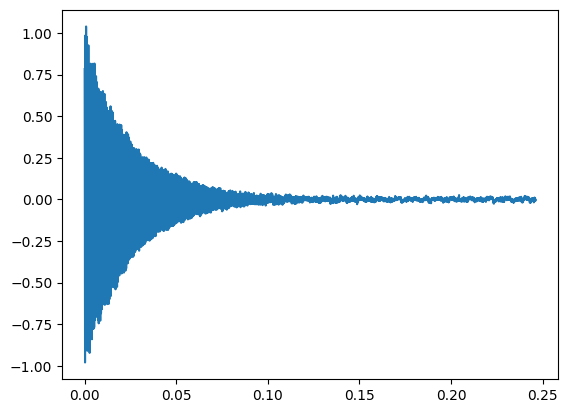

./data_traited/ini/raw_data_ampl_norm/LG_pl_a_8_ini_ampl_norm.wav


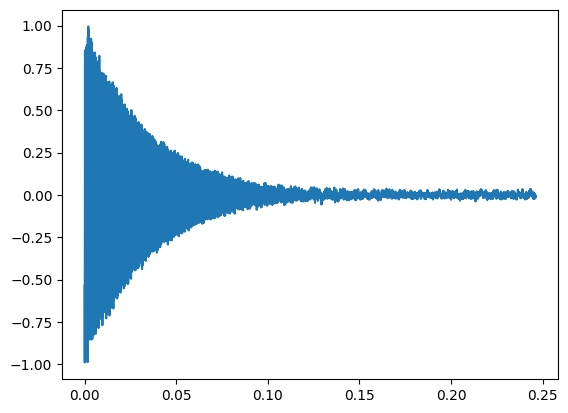

./data_traited/ini/raw_data_ampl_norm/L_pt_e2_1_ini_ampl_norm.wav


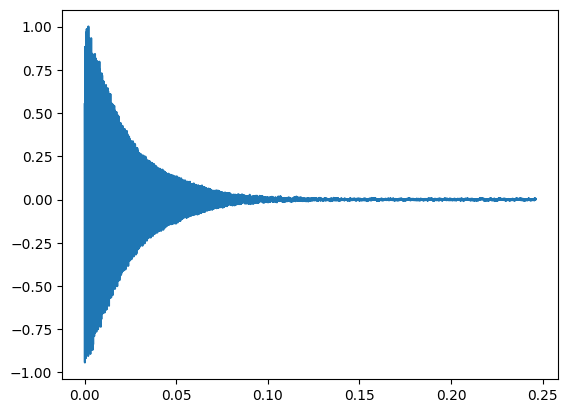

./data_traited/ini/raw_data_ampl_norm/M_pt_c3_1_ini_ampl_norm.wav


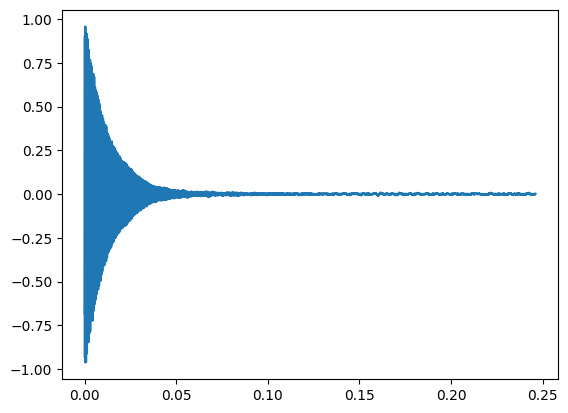

./data_traited/ini/raw_data_ampl_norm/M_pl_a2_7_ini_ampl_norm.wav


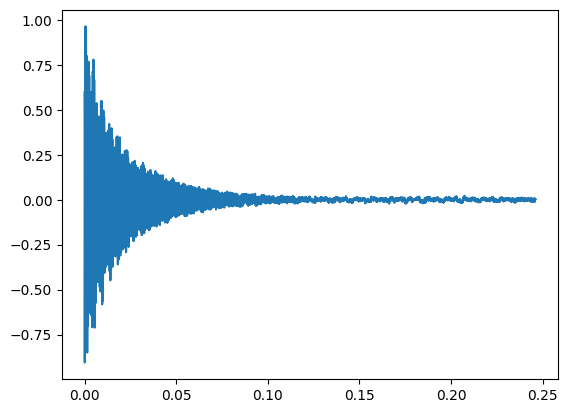

./data_traited/ini/raw_data_ampl_norm/M_pl_a1_7_ini_ampl_norm.wav


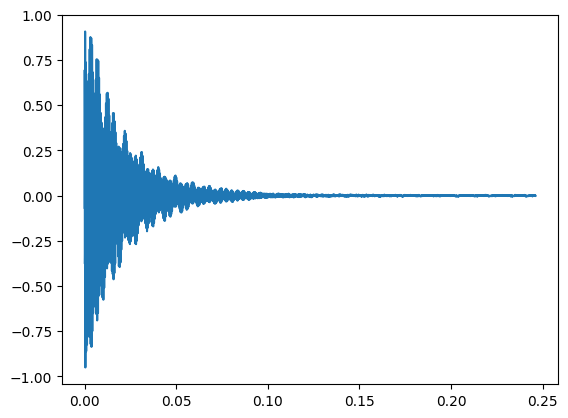

./data_traited/ini/raw_data_ampl_norm/M_pt_b2_3_ini_ampl_norm.wav


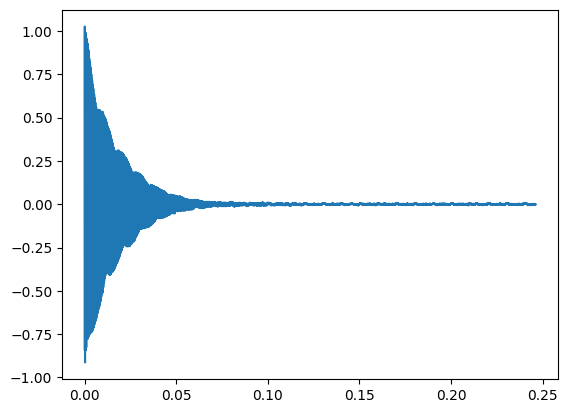

./data_traited/ini/raw_data_ampl_norm/M_pl_c_7_ini_ampl_norm.wav


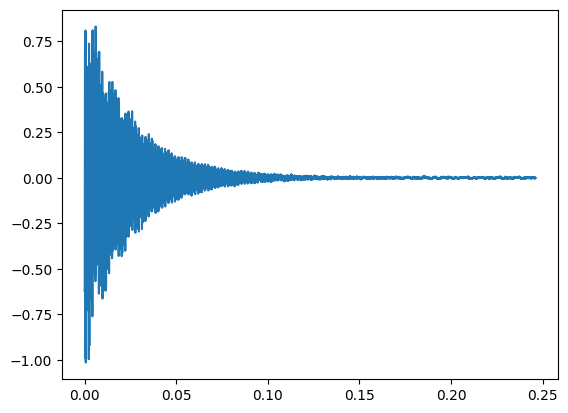

./data_traited/ini/raw_data_ampl_norm/L_pt_a2_3_ini_ampl_norm.wav


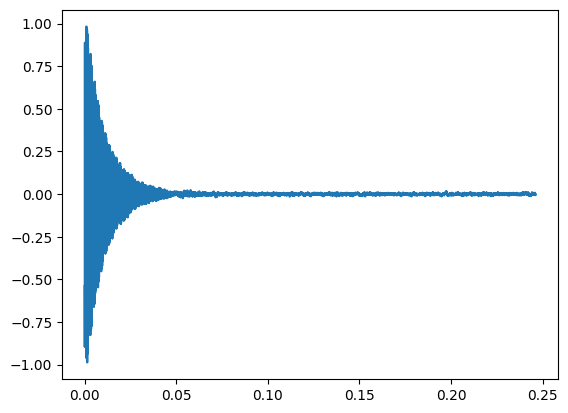

./data_traited/ini/raw_data_ampl_norm/M_pl_f_6_ini_ampl_norm.wav


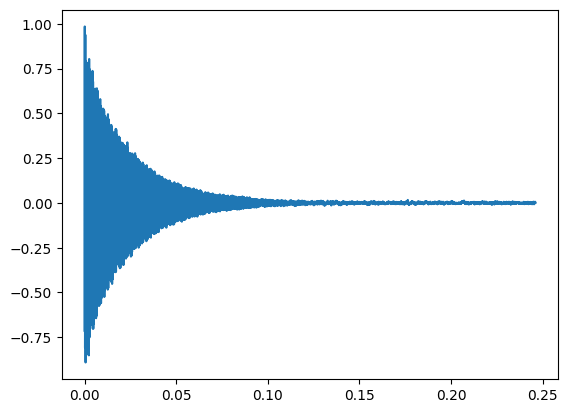

./data_traited/ini/raw_data_ampl_norm/L_pl_b_4_ini_ampl_norm.wav


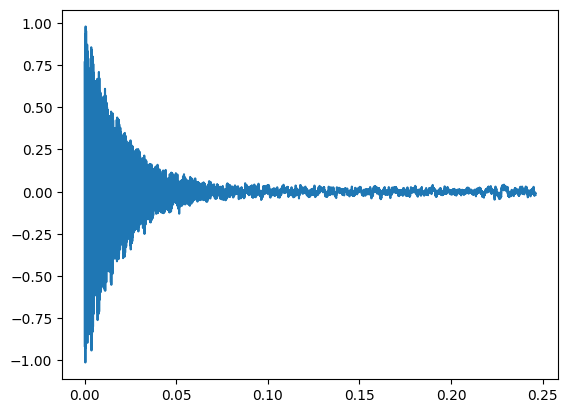

./data_traited/ini/raw_data_ampl_norm/P_pl_a_5_ini_ampl_norm.wav


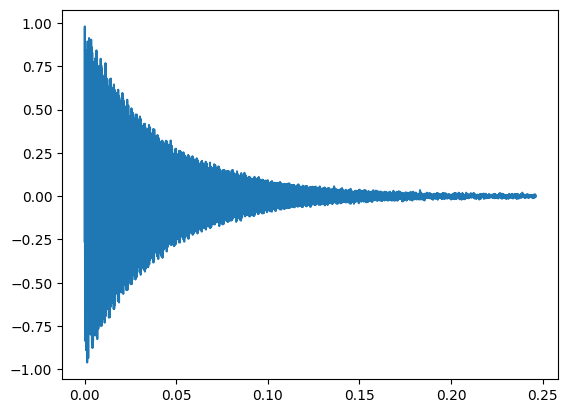

./data_traited/ini/raw_data_ampl_norm/M_pl_b_7_ini_ampl_norm.wav


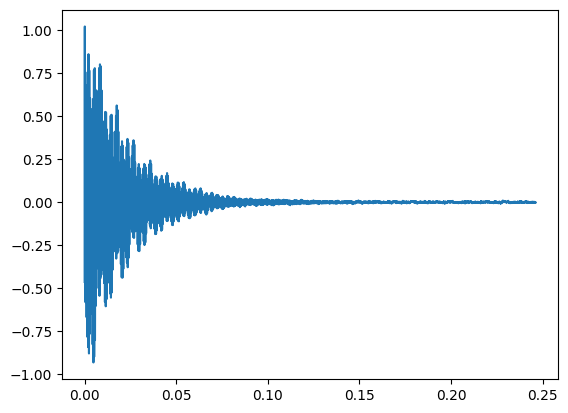

./data_traited/ini/raw_data_ampl_norm/M_pt_b3_3_ini_ampl_norm.wav


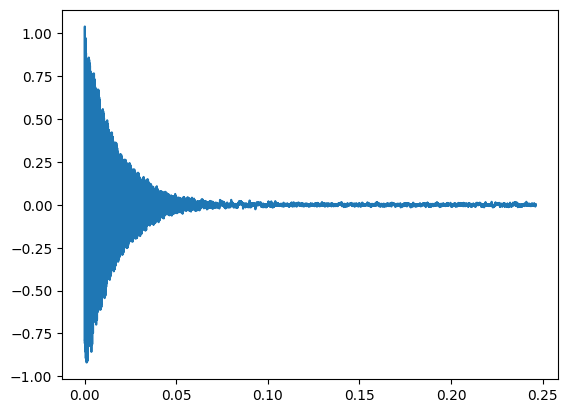

./data_traited/ini/raw_data_ampl_norm/L_pl_a_1_ini_ampl_norm.wav


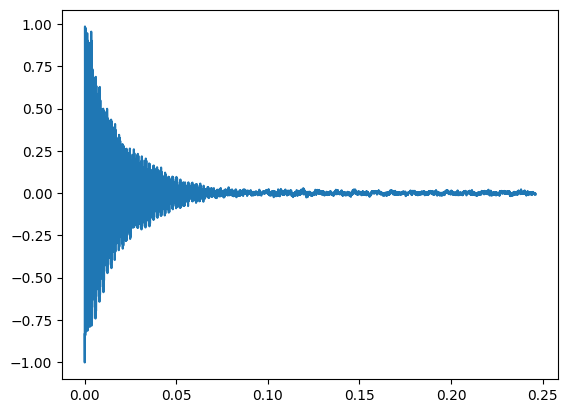

./data_traited/ini/raw_data_ampl_norm/L_pt_a3_3_ini_ampl_norm.wav


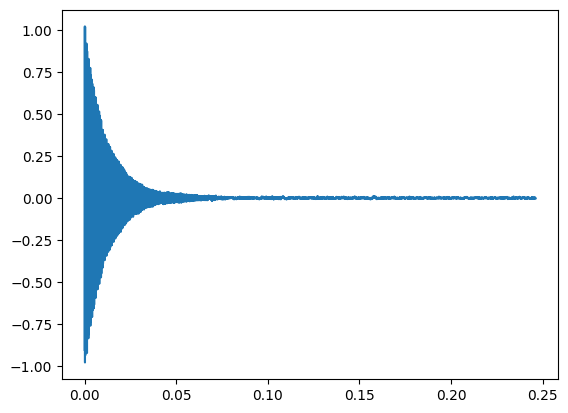

./data_traited/ini/raw_data_ampl_norm/M_pl_a2_2_ini_ampl_norm.wav


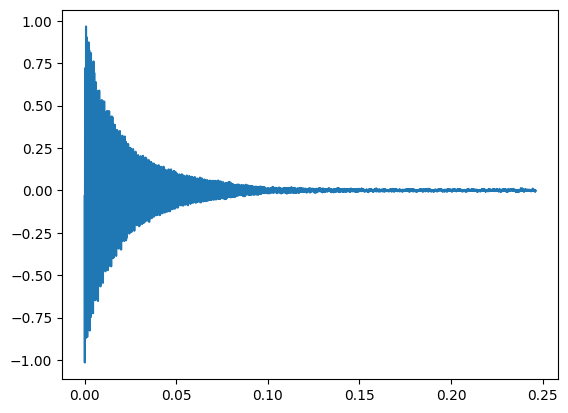

./data_traited/ini/raw_data_ampl_norm/L_pl_e_9_ini_ampl_norm.wav


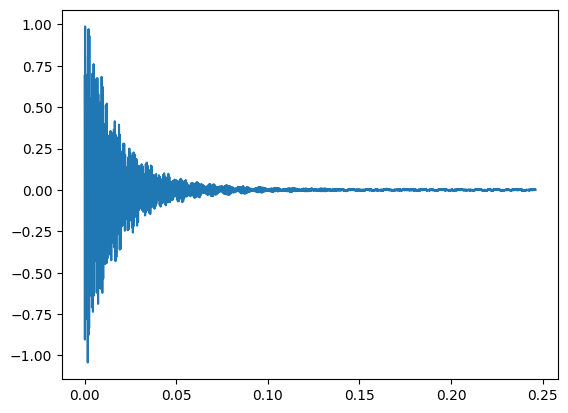

./data_traited/ini/raw_data_ampl_norm/M_pt_a3_3_ini_ampl_norm.wav


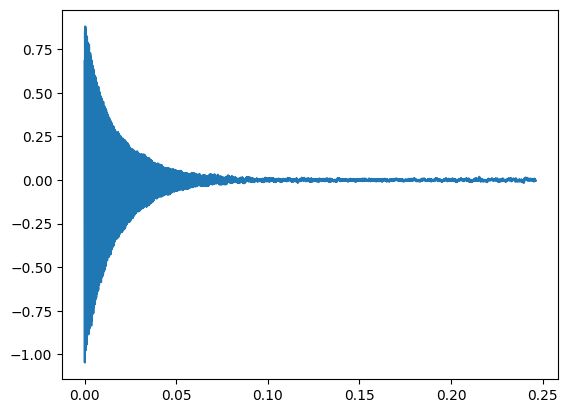

./data_traited/ini/raw_data_ampl_norm/S_pl_d_6_ini_ampl_norm.wav


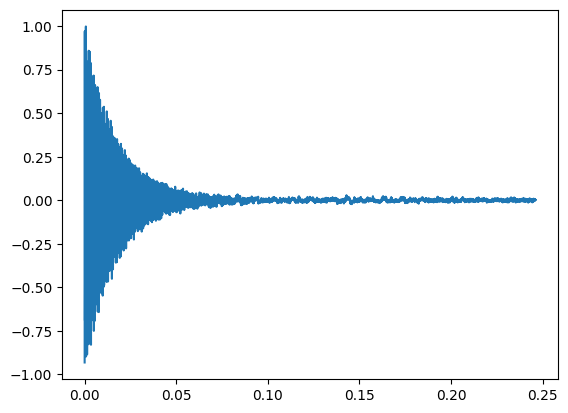

./data_traited/ini/raw_data_ampl_norm/S_pl_a_7_ini_ampl_norm.wav


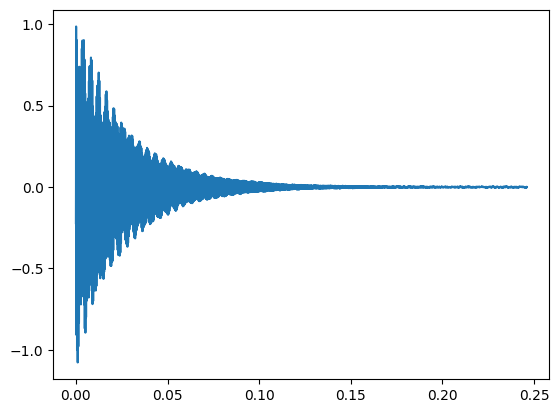

./data_traited/ini/raw_data_ampl_norm/M_pt_a2_3_ini_ampl_norm.wav


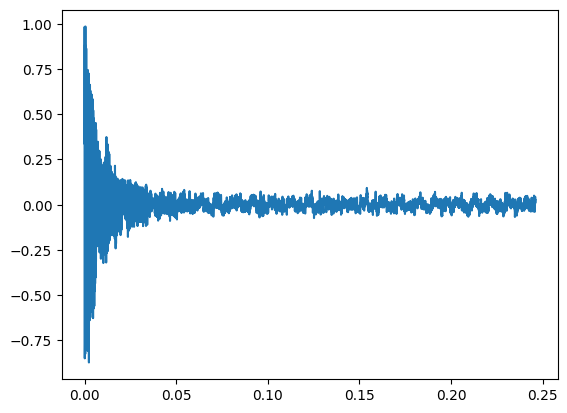

./data_traited/ini/raw_data_ampl_norm/LG_pl_a_4_ini_ampl_norm.wav


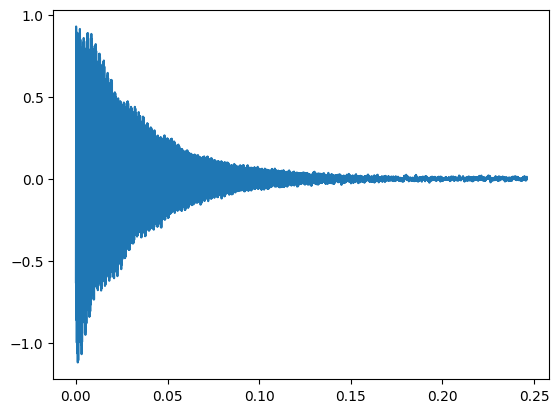

./data_traited/ini/raw_data_ampl_norm/L_pl_a_8_ini_ampl_norm.wav


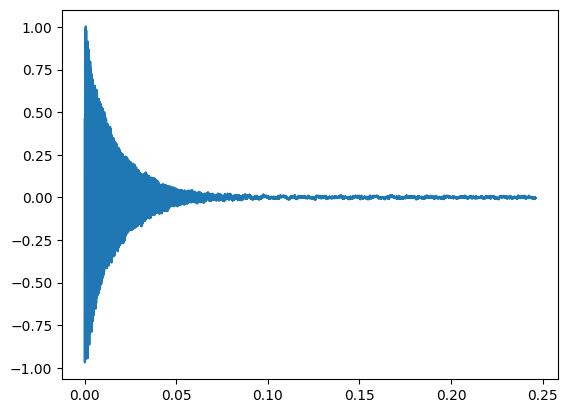

./data_traited/ini/raw_data_ampl_norm/P_pl_a_9_ini_ampl_norm.wav


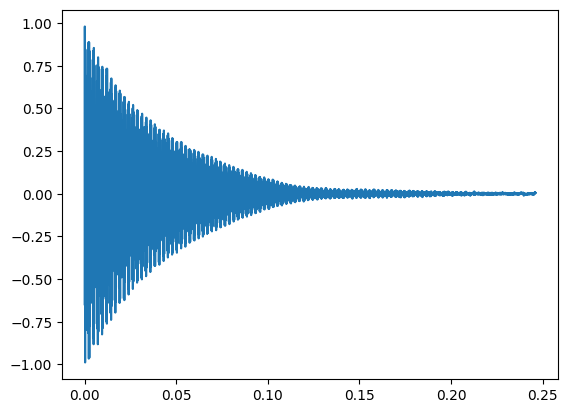

./data_traited/ini/raw_data_ampl_norm/L_pl_b_8_ini_ampl_norm.wav


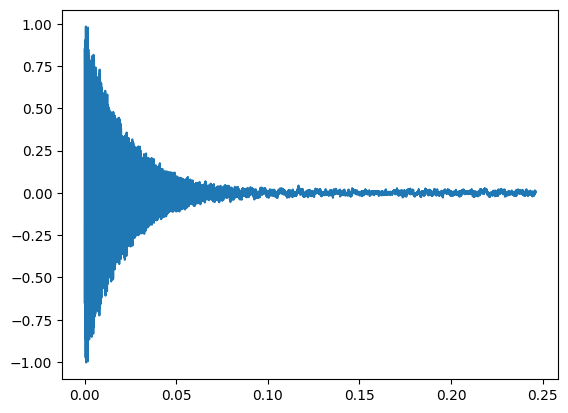

./data_traited/ini/raw_data_ampl_norm/S_pl_d_3_ini_ampl_norm.wav


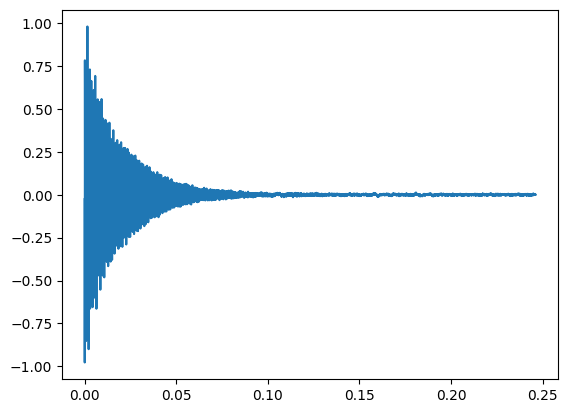

./data_traited/ini/raw_data_ampl_norm/M_pt_a4_2_ini_ampl_norm.wav


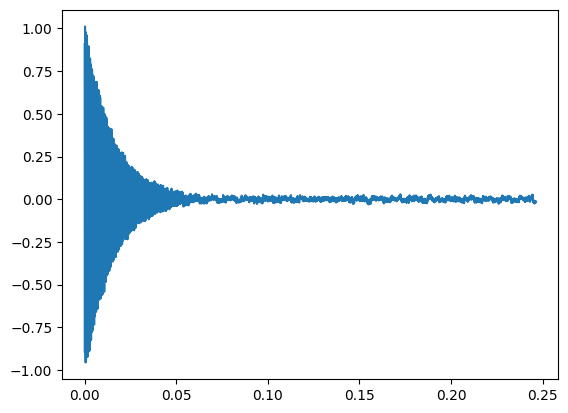

./data_traited/ini/raw_data_ampl_norm/S_pl_a_2_ini_ampl_norm.wav


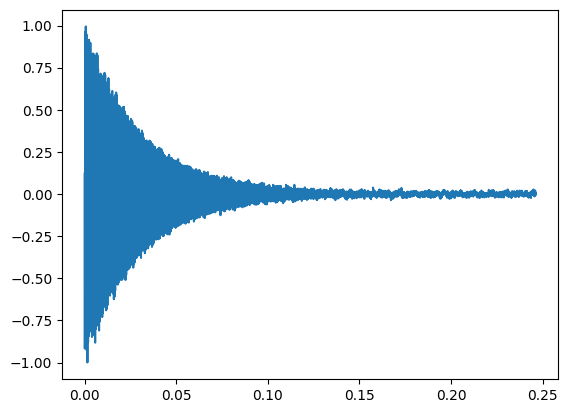

./data_traited/ini/raw_data_ampl_norm/LG_pl_a_1_ini_ampl_norm.wav


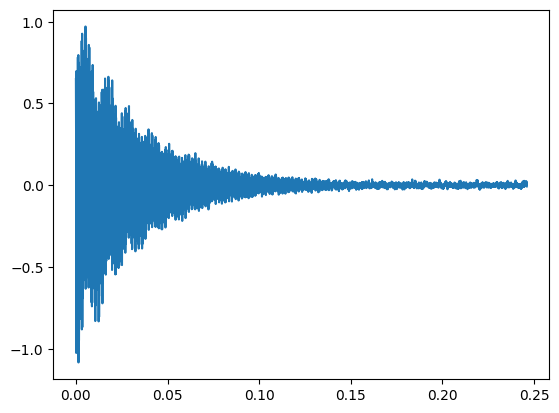

./data_traited/ini/raw_data_ampl_norm/L_pl_e_8_ini_ampl_norm.wav


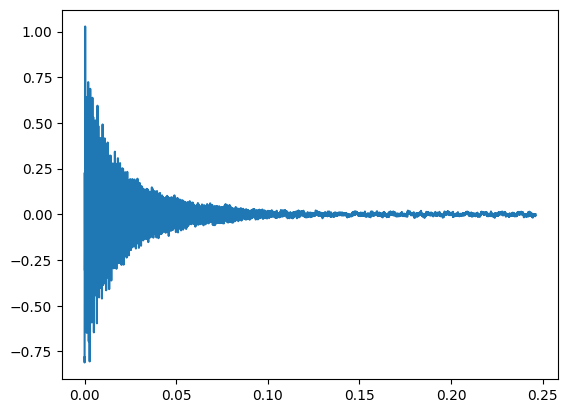

./data_traited/ini/raw_data_ampl_norm/M_pt_a3_2_ini_ampl_norm.wav


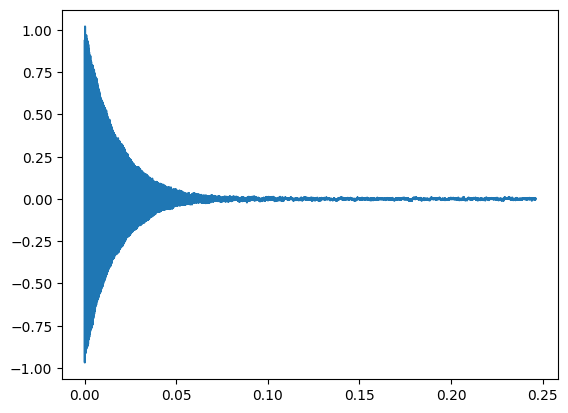

./data_traited/ini/raw_data_ampl_norm/S_pl_d_7_ini_ampl_norm.wav


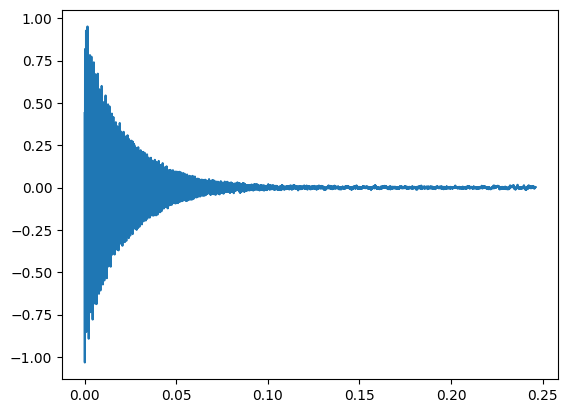

./data_traited/ini/raw_data_ampl_norm/S_pl_a_6_ini_ampl_norm.wav


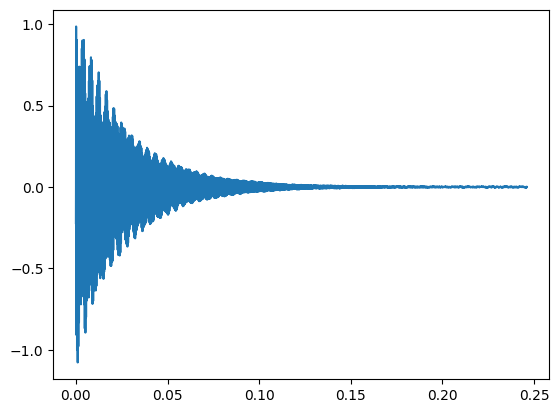

./data_traited/ini/raw_data_ampl_norm/L_pt_b2_2_ini_ampl_norm.wav


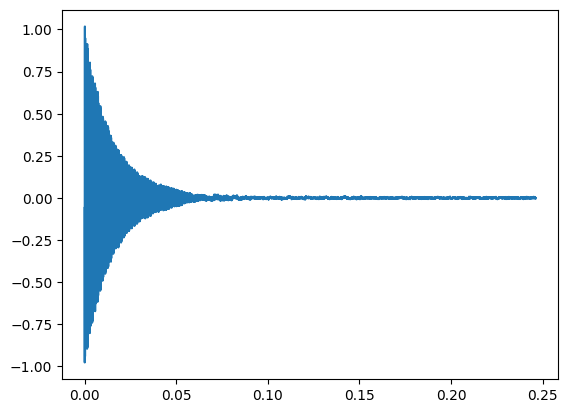

./data_traited/ini/raw_data_ampl_norm/LG_pl_a_5_ini_ampl_norm.wav


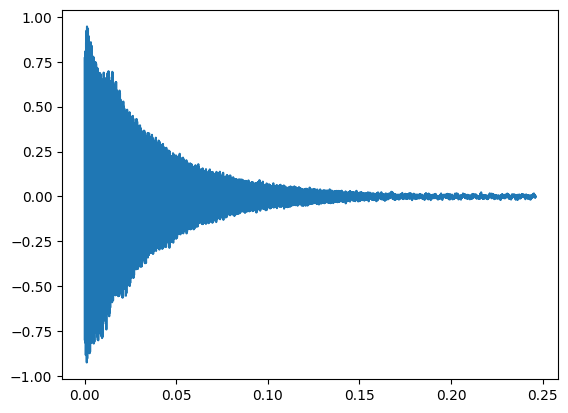

./data_traited/ini/raw_data_ampl_norm/M_pt_a2_2_ini_ampl_norm.wav


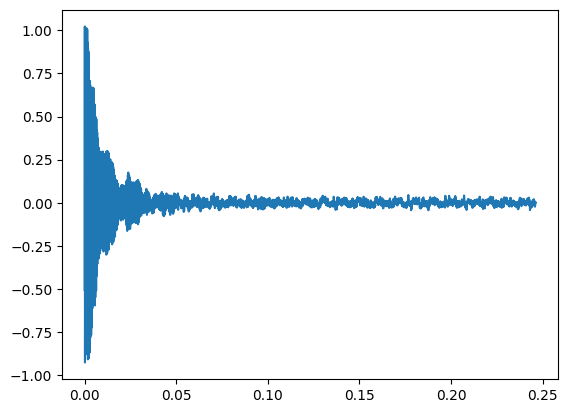

./data_traited/ini/raw_data_ampl_norm/S_pt_d2_1_ini_ampl_norm.wav


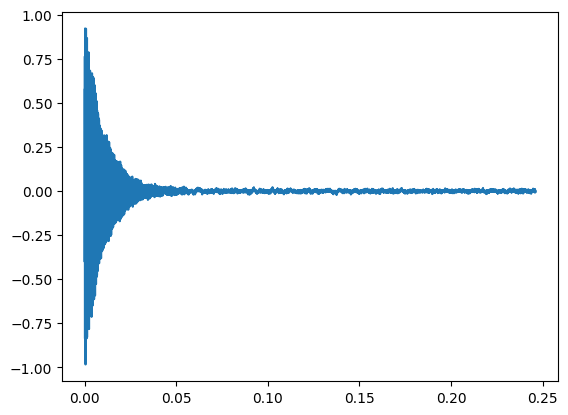

./data_traited/ini/raw_data_ampl_norm/L_pl_a_9_ini_ampl_norm.wav


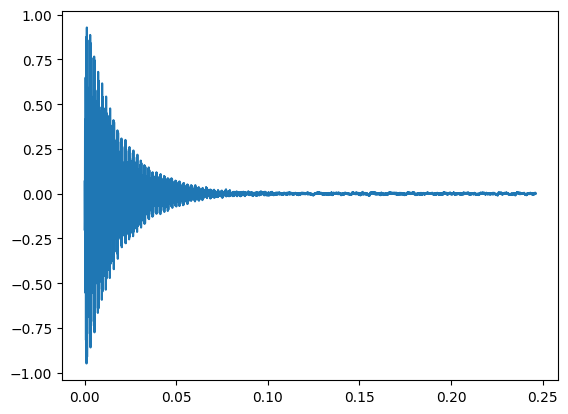

./data_traited/ini/raw_data_ampl_norm/S_pl_d_2_ini_ampl_norm.wav


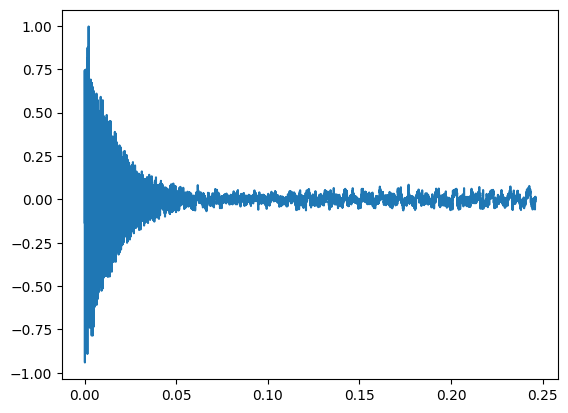

./data_traited/ini/raw_data_ampl_norm/L_pl_b_9_ini_ampl_norm.wav


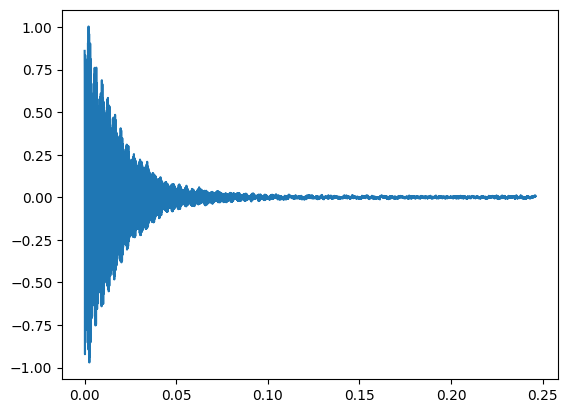

./data_traited/ini/raw_data_ampl_norm/P_pl_a_8_ini_ampl_norm.wav


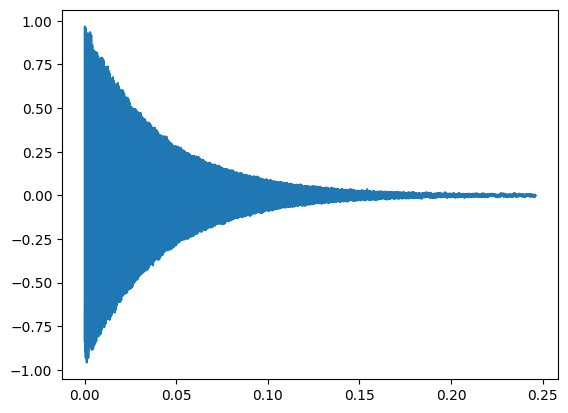

./data_traited/ini/raw_data_ampl_norm/M_pt_a4_3_ini_ampl_norm.wav


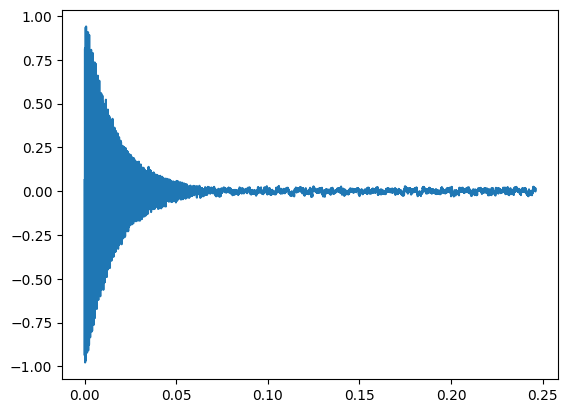

./data_traited/ini/raw_data_ampl_norm/S_pl_a_3_ini_ampl_norm.wav


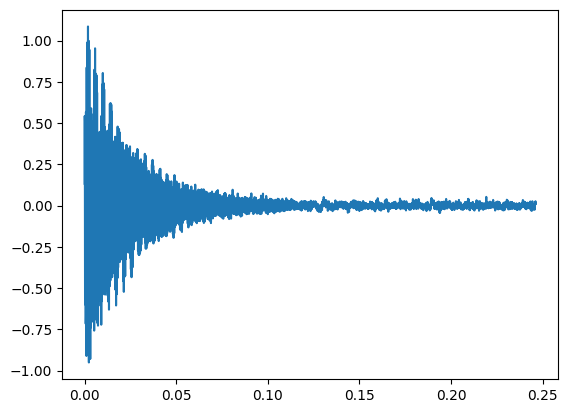

./data_traited/ini/raw_data_ampl_norm/M_pt_a3_1_ini_ampl_norm.wav


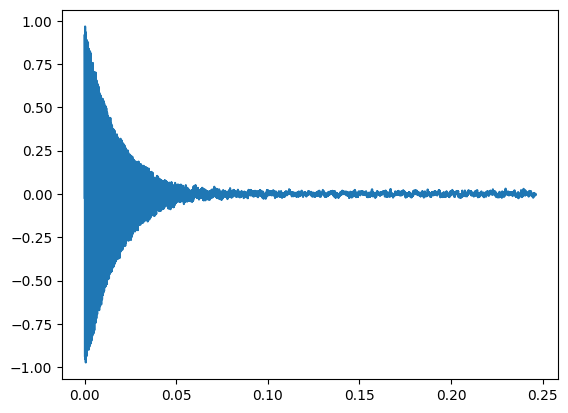

./data_traited/ini/raw_data_ampl_norm/S_pl_d_4_ini_ampl_norm.wav


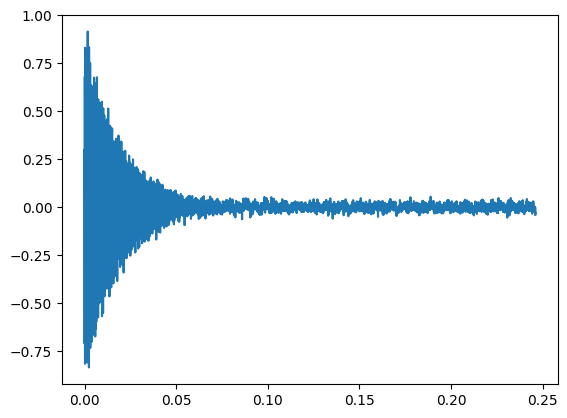

./data_traited/ini/raw_data_ampl_norm/S_pl_a_5_ini_ampl_norm.wav


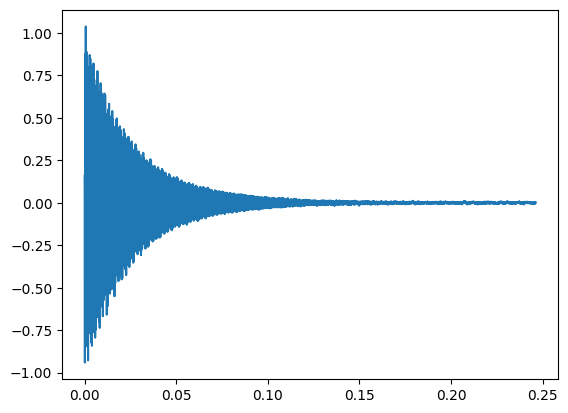

./data_traited/ini/raw_data_ampl_norm/M_pl_a2_9_ini_ampl_norm.wav


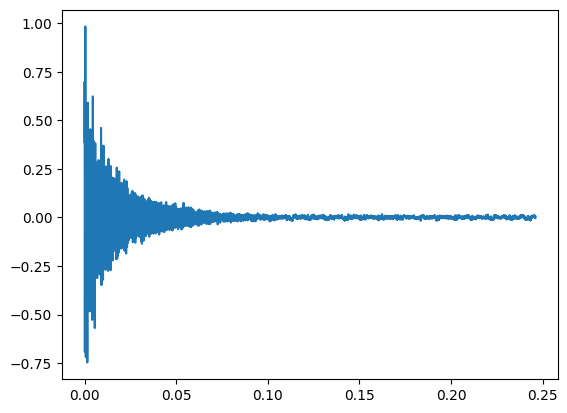

./data_traited/ini/raw_data_ampl_norm/L_pt_b2_1_ini_ampl_norm.wav


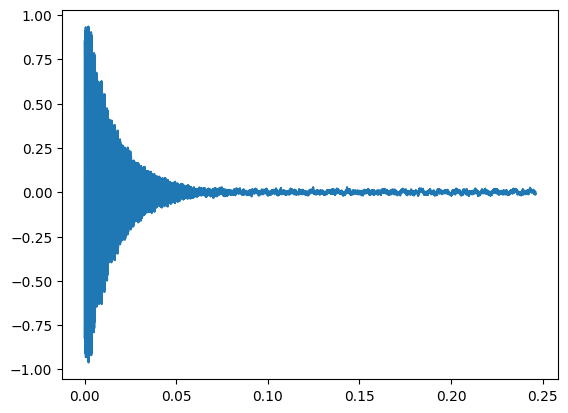

./data_traited/ini/raw_data_ampl_norm/LG_pl_a_6_ini_ampl_norm.wav


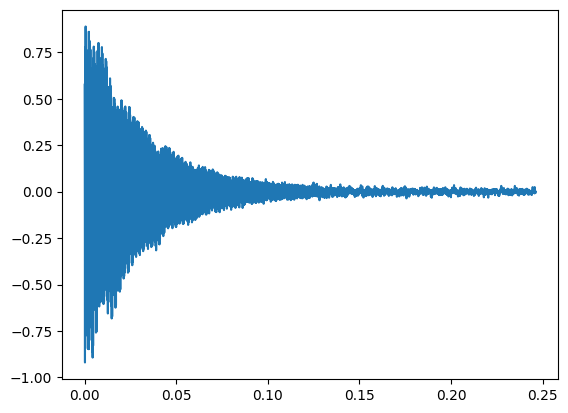

./data_traited/ini/raw_data_ampl_norm/M_pt_a2_1_ini_ampl_norm.wav


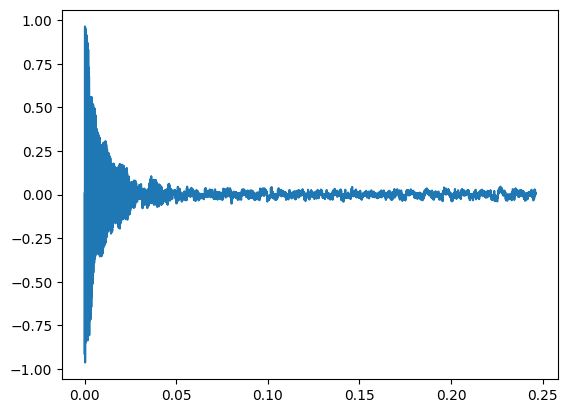

./data_traited/ini/raw_data_ampl_norm/S_pl_d_1_ini_ampl_norm.wav


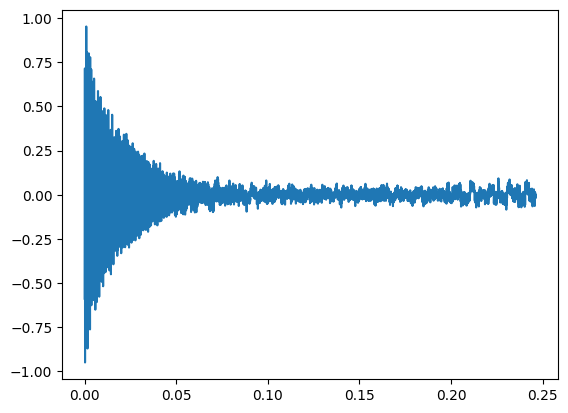

./data_traited/ini/raw_data_ampl_norm/S_pt_d4_3_ini_ampl_norm.wav


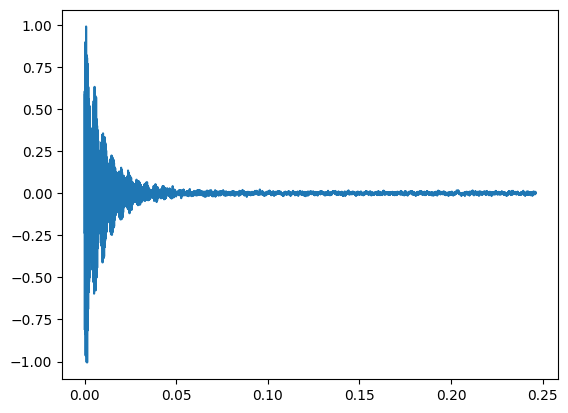

./data_traited/ini/raw_data_ampl_norm/M_pl_f_8_ini_ampl_norm.wav


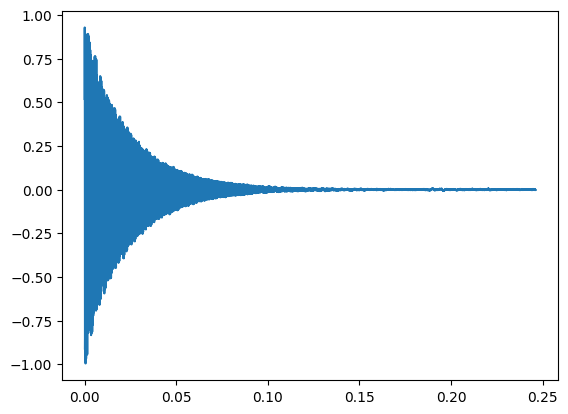

./data_traited/ini/raw_data_ampl_norm/M_pl_a1_9_ini_ampl_norm.wav


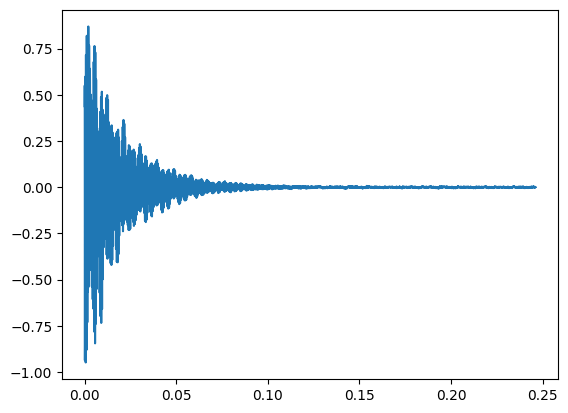

./data_traited/ini/raw_data_ampl_norm/M_pl_c_9_ini_ampl_norm.wav


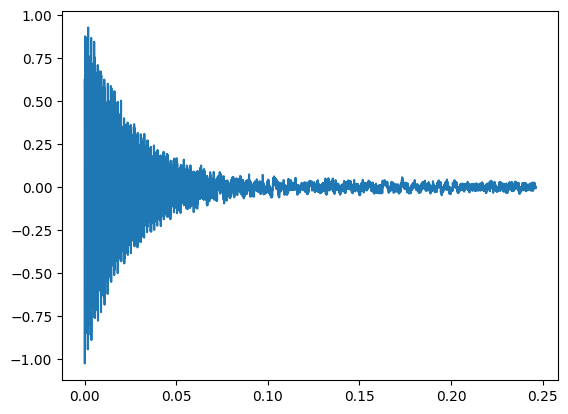

./data_traited/ini/raw_data_ampl_norm/LG_pl_a_3_ini_ampl_norm.wav


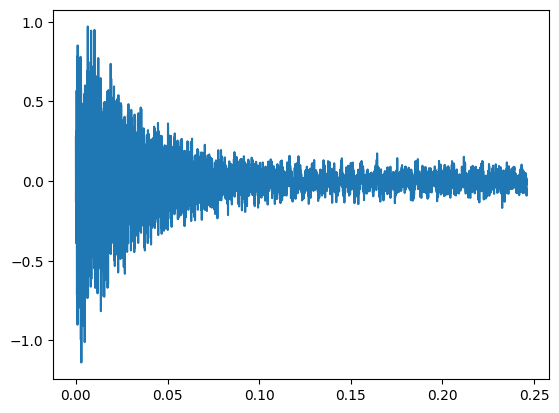

./data_traited/ini/raw_data_ampl_norm/M_pl_b_9_ini_ampl_norm.wav


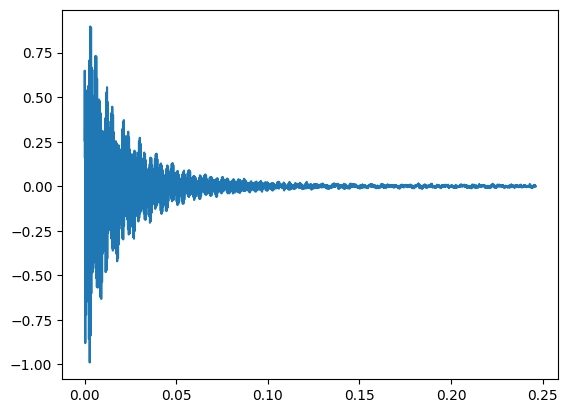

./data_traited/ini/raw_data_ampl_norm/S_pt_d3_3_ini_ampl_norm.wav


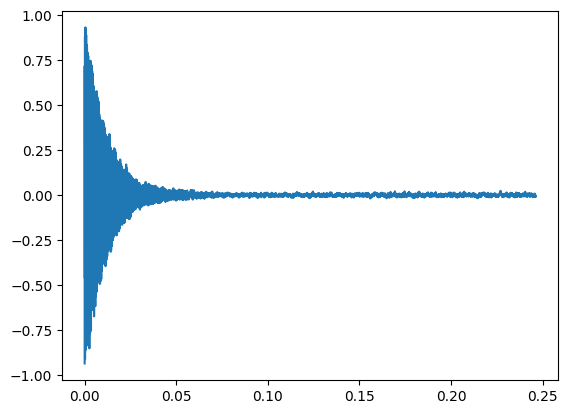

./data_traited/ini/raw_data_ampl_norm/S_pl_a_4_ini_ampl_norm.wav


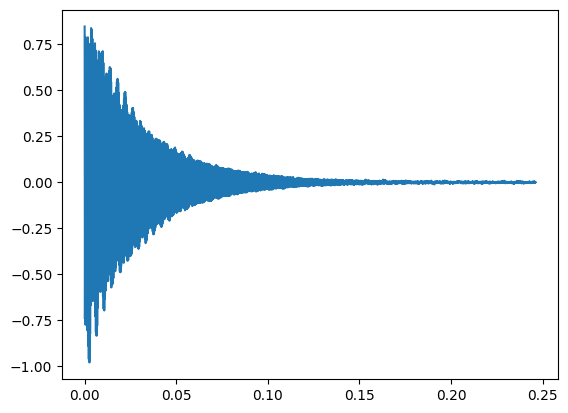

./data_traited/ini/raw_data_ampl_norm/M_pl_a2_8_ini_ampl_norm.wav


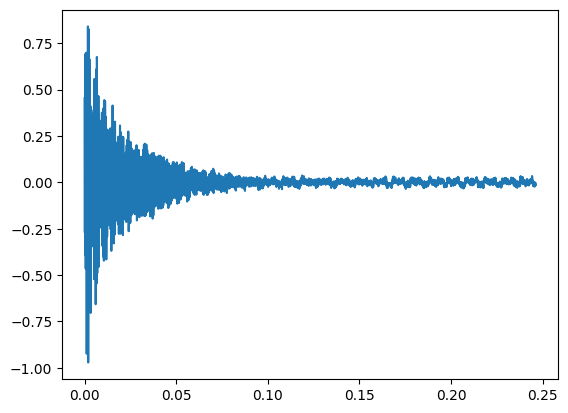

./data_traited/ini/raw_data_ampl_norm/S_pt_d2_3_ini_ampl_norm.wav


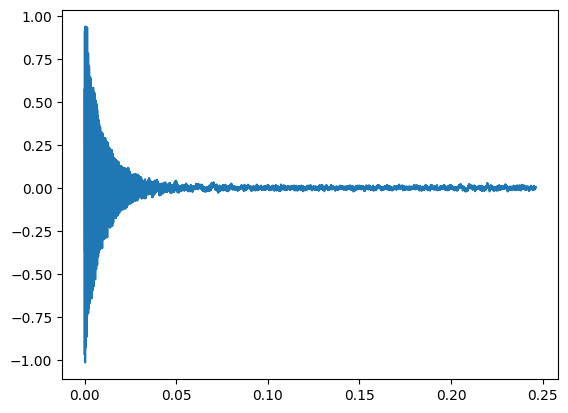

./data_traited/ini/raw_data_ampl_norm/LG_pl_a_7_ini_ampl_norm.wav


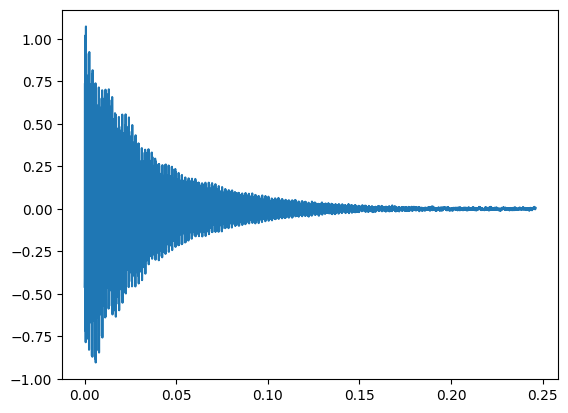

./data_traited/ini/raw_data_ampl_norm/M_pt_a4_1_ini_ampl_norm.wav


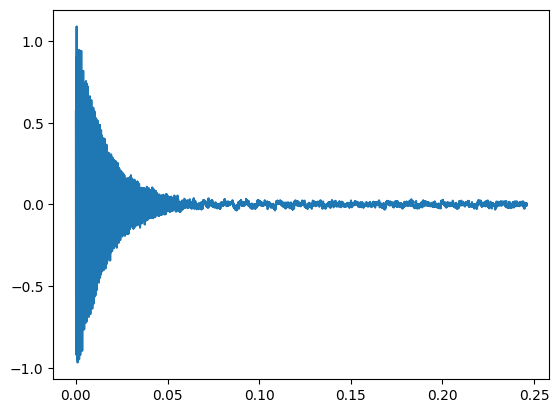

./data_traited/ini/raw_data_ampl_norm/S_pt_d4_2_ini_ampl_norm.wav


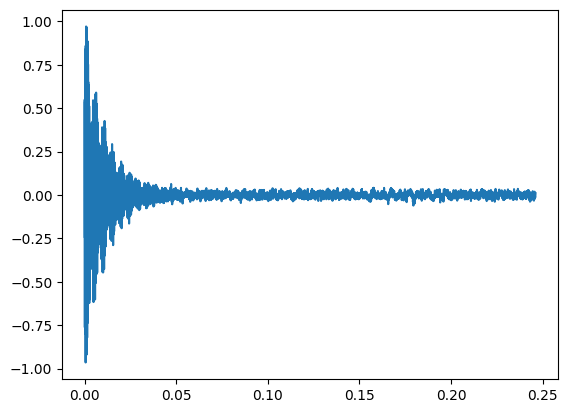

./data_traited/ini/raw_data_ampl_norm/M_pl_f_9_ini_ampl_norm.wav


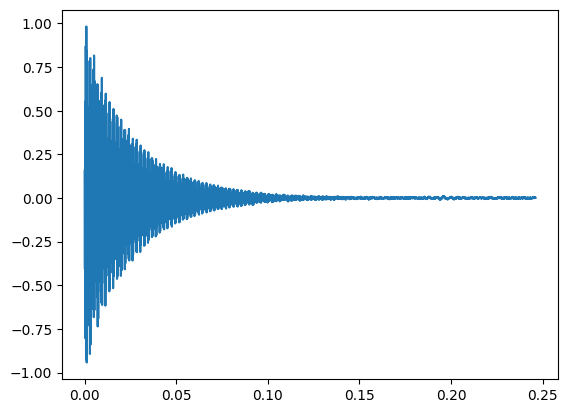

./data_traited/ini/raw_data_ampl_norm/M_pl_a1_8_ini_ampl_norm.wav


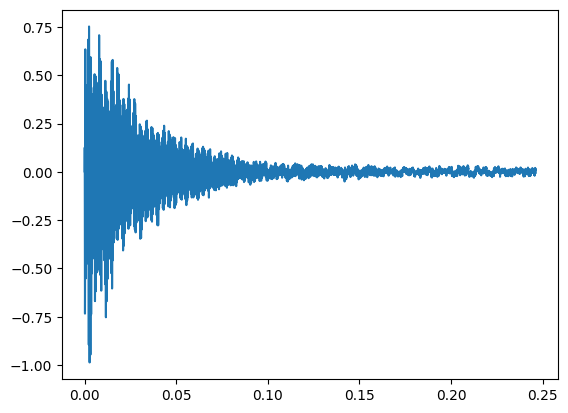

./data_traited/ini/raw_data_ampl_norm/M_pl_c_8_ini_ampl_norm.wav


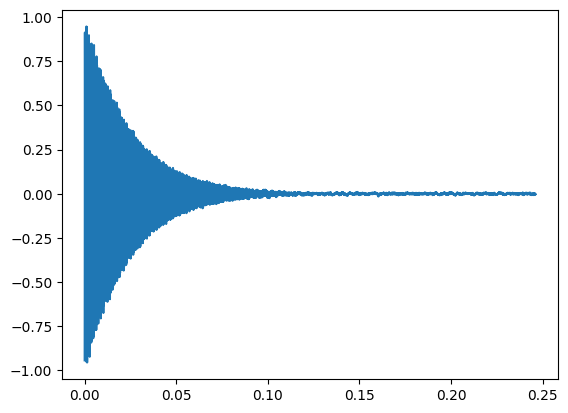

./data_traited/ini/raw_data_ampl_norm/S_pl_a_1_ini_ampl_norm.wav


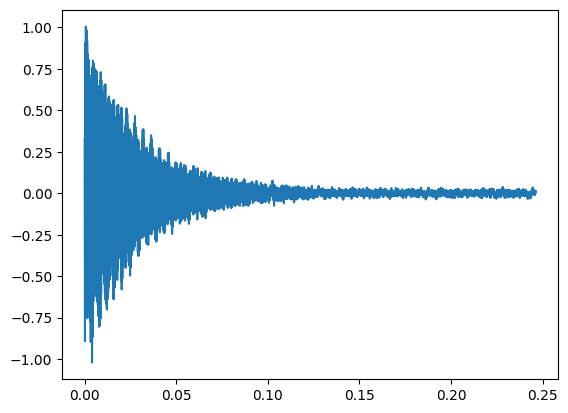

./data_traited/ini/raw_data_ampl_norm/LG_pl_a_2_ini_ampl_norm.wav


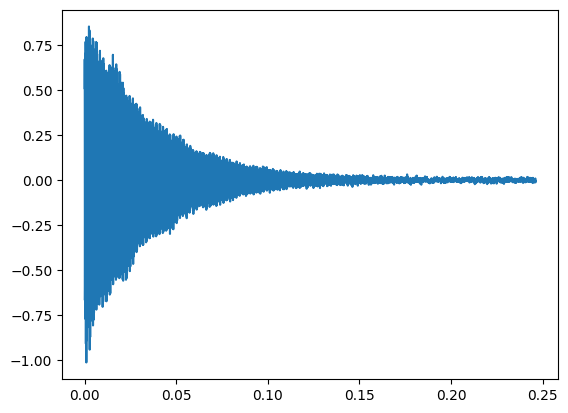

./data_traited/ini/raw_data_ampl_norm/M_pl_b_8_ini_ampl_norm.wav


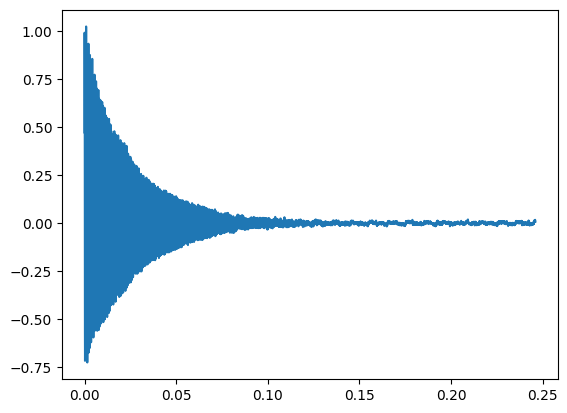

In [50]:
#Affichage des sons normalisés en temps et en amplitude
data_dir_ini = './data_traited/ini/raw_data_ampl_norm/'
audio_files_ini = glob(data_dir_ini+'/*.wav')

for file in range(0, len(audio_files_ini),1):
    audio, sfreq = lr.load(audio_files_ini[file], sr=22500)
    fig,ax = plt.subplots()
    time = np.arange(0,len(audio))/sfreq
    ax.plot(time,audio, label=audio_files_ini[file])
    print(audio_files_ini[file])
    plt.show()